## Alzheimers Disease Clasification of 6 Classes

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

import cv2
from tqdm import tqdm
import io
import seaborn as sns

from sklearn.utils import shuffle # Shuffle arrays or sparse matrices in a consistent way
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.applications import DenseNet121
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard,ModelCheckpoint

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



import ipywidgets as widgets
from PIL import Image
from IPython.display import display, clear_output

In [2]:
labels = ['AD','CN','MCI','LMCI','EMCI','SMC']

In [3]:
X_train = [] #Training Dataset
Y_train = [] #Training Labels

image_size=150

for i in labels:
    folderPath = os.path.join(r'C:\Users\HP\FYP_SOFTWARE 2023\CODE AND DATASETS\2_LEVEL_DTCWT OUTPUT', i)
    for j in tqdm(os.listdir(folderPath)):
        image = cv2.imread(os.path.join(folderPath, j))
        image = cv2.resize(image, (image_size, image_size))
        X_train.append(image)
        Y_train.append(i)
        
        
for i in labels:
    folderPath = os.path.join(r'C:\Users\HP\FYP_SOFTWARE 2023\CODE AND DATASETS\2_LEVEL_DTCWT OUTPUT', i) # Join two or more pathname components
    for j in tqdm(os.listdir(folderPath)):
        image = cv2.imread(os.path.join(folderPath, j))
        image = cv2.resize(image, (image_size, image_size))
        X_train.append(image)
        Y_train.append(i)
        
# converted into array

Xtrain = np.array(X_train)
Ytrain = np.array(Y_train)

100%|████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<00:00, 4354.92it/s]


In [4]:
Xtrain.shape

(994, 150, 150, 3)

In [5]:
Ytrain.shape

(994,)

In [6]:
Xtrain, Ytrain = shuffle(Xtrain, Ytrain, random_state=42)

## Train test split which is divided train dataset and validation dataset

In [7]:
xtrain,xtest, Ytrain,ytest = train_test_split(Xtrain, Ytrain,test_size=0.12
                                              , random_state=42)

In [8]:
xtrain.shape

(874, 150, 150, 3)

In [9]:
Ytrain.shape

(874,)

In [10]:
xtest.shape

(120, 150, 150, 3)



## Converting labels into One hot encoder

In [11]:
ytrain_new = []
ytest_new = []

for i in Ytrain:
    ytrain_new.append(labels.index(i))
ytrain = to_categorical(ytrain_new) 

for i in ytest:
    ytest_new.append(labels.index(i))

ytest = to_categorical(ytest_new)

In [12]:
ytrain.shape

(874, 6)

In [13]:
ytest.shape

(120, 6)

In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
# Set your image dimensions and other parameters
img_width, img_height = 150, 150  # Adjust as needed
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 10

# Data augmentation to improve generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Set your dataset paths
train_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train'
test_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train'

# Create generators for training and validation data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),  # Adjusted target size
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),  # Adjusted target size
    batch_size=batch_size,
    class_mode='categorical')

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(6, activation='softmax'))  # Assuming 6 classes, adjust as needed


Found 497 images belonging to 7 classes.
Found 497 images belonging to 7 classes.


In [38]:
from keras.preprocessing.image import ImageDataGenerator
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Table(
    header=dict(values=["Layer (type)", "Output Shape", "Param #"]),
    cells=dict(values=[["Input Layer"] + [f"Conv2D-{i}" for i in range(4)] + ["Flatten", "Dense", "Dropout", "Output Layer"],
                       [model.layers[i].output_shape[1:] for i in range(len(model.layers))],
                       [model.layers[i].count_params() for i in range(len(model.layers))]])))

# Update the layout
fig.update_layout(title="Model Architecture")

# Save the figure
fig.write_html("model_architecture_plotly.html")
html_file_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\model_architecture_plotly.html'

# Save the figure as an HTML file
fig.write_html(html_file_path)

# Print a message indicating where the file was saved
print(f"Model architecture visualization saved to: {html_file_path}")

Model architecture visualization saved to: D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\model_architecture_plotly.html


In [39]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 128)      

In [40]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc')
]
model.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=METRICS)

In [41]:
tensorBoard = TensorBoard(log_dir="logs")
checkPoint = ModelCheckpoint("model_d.h5",
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_acc',
                             factor=0.3,
                             patience=2,
                             verbose=1,
                             mode='auto',
                            min_delta=0.001)

## Fit the Model

In [42]:
print("Xtrain shape:", xtrain.shape)
print("Ytrain shape:", xtest.shape)



Xtrain shape: (874, 150, 150, 3)
Ytrain shape: (120, 150, 150, 3)


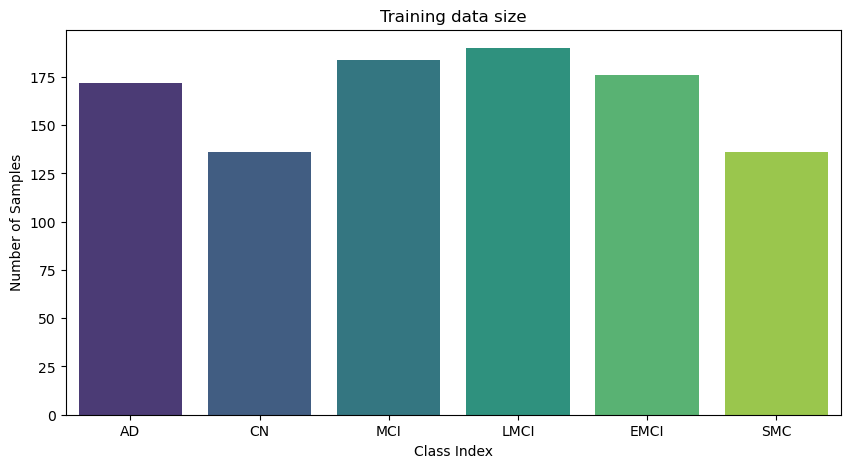

In [43]:
plt.figure(figsize=(10, 5))
sns.countplot(x=Ytrain, palette='viridis')
plt.title('Training data size')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.show()


In [44]:
import visualkeras

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
model.add(visualkeras.SpacingDummyLayer(spacing=100))


In [45]:
plot_model(model, to_file='cnn.png', show_shapes=True, show_layer_names=True)

history=model.fit(xtrain, ytrain, epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30
22/22 [==============================] - 9s 356ms/step - loss: 12.8066 - accuracy: 0.7976 - precision: 0.1287 - recall: 0.0372 - auc: 0.5432 - val_loss: 1.6445 - val_accuracy: 0.8333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7175
Epoch 2/30
22/22 [==============================] - 8s 343ms/step - loss: 1.6108 - accuracy: 0.8317 - precision: 0.4386 - recall: 0.0358 - auc: 0.7072 - val_loss: 1.4965 - val_accuracy: 0.8457 - val_precision: 0.8824 - val_recall: 0.0857 - val_auc: 0.7738
Epoch 3/30
22/22 [==============================] - 8s 347ms/step - loss: 1.4017 - accuracy: 0.8472 - precision: 0.6368 - recall: 0.1931 - auc: 0.7924 - val_loss: 1.2630 - val_accuracy: 0.8629 - val_precision: 0.7313 - val_recall: 0.2800 - val_auc: 0.8374
Epoch 4/30
22/22 [==============================] - 8s 356ms/step - loss: 1.1944 - accuracy: 0.8674 - precision: 0.7214 - recall: 0.3333 - auc: 0.8552 - val_loss: 1.1801 - val_accuracy: 0.8581 - val_precision: 0.7097 - val_

In [46]:
# Save the trained model
model.save('your_trained_model.h5')




C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [47]:
ev = model.predict(xtest)




4/4 [==============================] - 0s 68ms/step


4/4 [==============================] - 0s 91ms/step
Accuracy: 0.9416666666666667


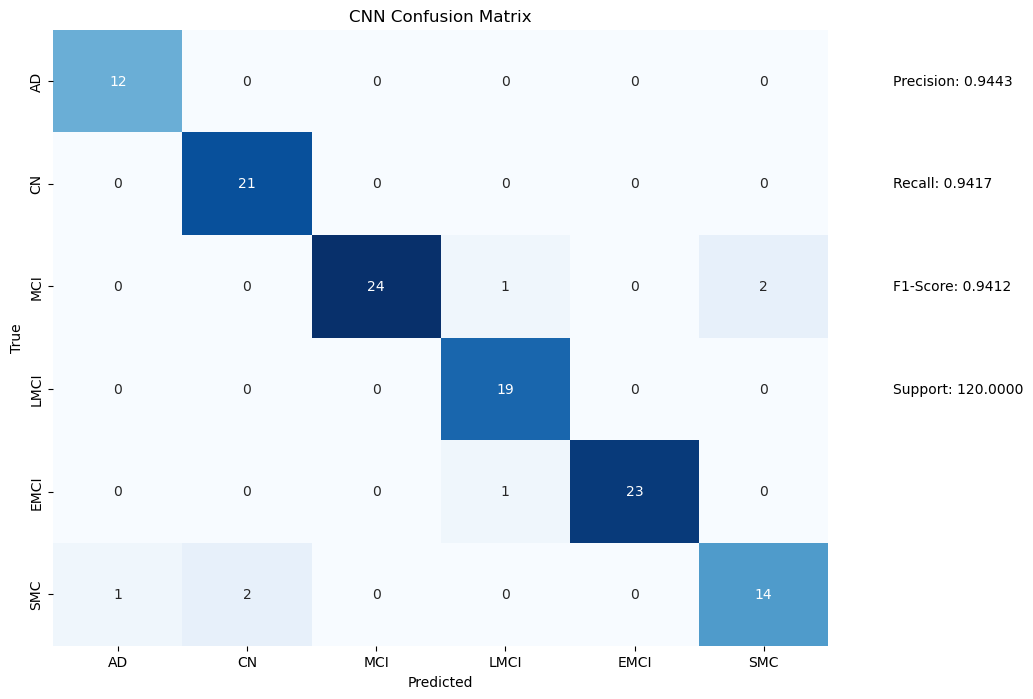

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'labels' is a list of class labels
labels = ['AD', 'CN', 'MCI', 'LMCI', 'EMCI', 'SMC']

# Assuming 'xtest' and 'ytest' are your test data and labels
pred = model.predict(xtest)
pred = np.argmax(pred, axis=1)

actual_label = np.argmax(ytest, axis=1)

conf_matrix = confusion_matrix(actual_label, pred)
accuracy = accuracy_score(actual_label, pred)
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)

# Display overall metrics below the x-axis
report = classification_report(actual_label, pred, target_names=labels, output_dict=True)
overall_metrics = report['weighted avg']

# Display metrics below the x-axis
metrics_labels = ['Precision', 'Recall', 'F1-Score', 'Support']
metrics_values = [overall_metrics['precision'], overall_metrics['recall'], overall_metrics['f1-score'], overall_metrics['support']]

for i, metric in enumerate(metrics_labels):
    plt.text(len(labels) + 0.5, i + 0.5, f'{metric}: {metrics_values[i]:.4f}', verticalalignment='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN Confusion Matrix')
plt.show()


In [49]:
print(conf_matrix)

[[12  0  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  0 24  1  0  2]
 [ 0  0  0 19  0  0]
 [ 0  0  0  1 23  0]
 [ 1  2  0  0  0 14]]


4/4 [==============================] - 0s 93ms/step
Accuracy: 0.9416666666666667

Metrics for AD:
Precision: 0.9231
Recall: 1.0000
F1-score: 0.9600

Metrics for CN:
Precision: 0.9130
Recall: 1.0000
F1-score: 0.9545

Metrics for MCI:
Precision: 1.0000
Recall: 0.8889
F1-score: 0.9412

Metrics for LMCI:
Precision: 0.9048
Recall: 1.0000
F1-score: 0.9500

Metrics for EMCI:
Precision: 1.0000
Recall: 0.9583
F1-score: 0.9787

Metrics for SMC:
Precision: 0.8750
Recall: 0.8235
F1-score: 0.8485


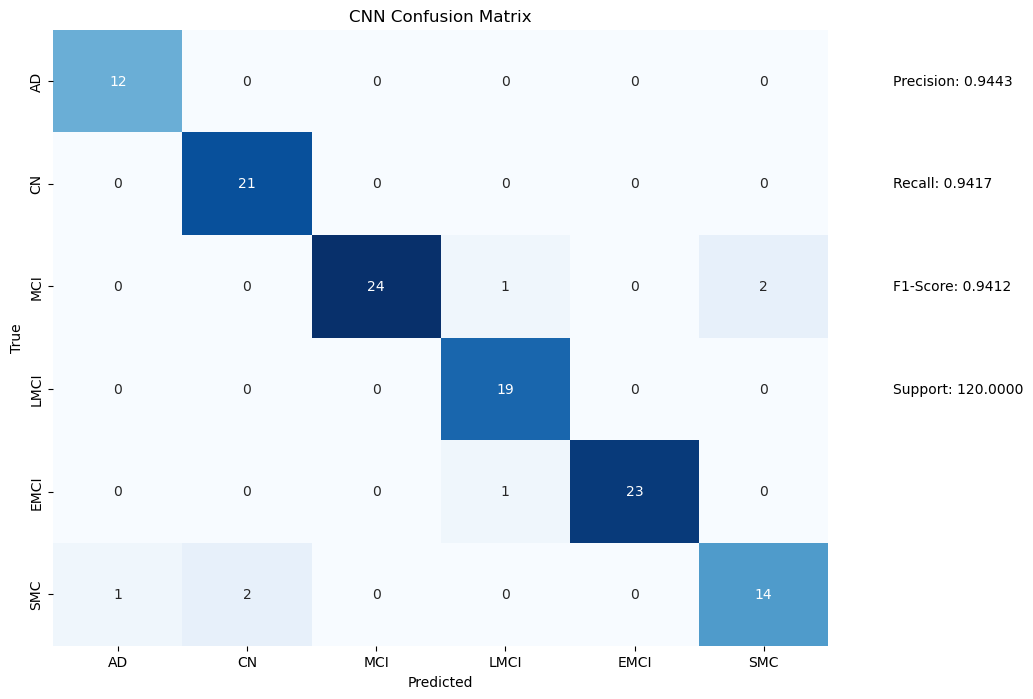

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'labels' is a list of class labels
labels = ['AD', 'CN', 'MCI', 'LMCI', 'EMCI', 'SMC']

# Assuming 'xtest' and 'ytest' are your test data and labels
pred = model.predict(xtest)
pred = np.argmax(pred, axis=1)

actual_label = np.argmax(ytest, axis=1)

conf_matrix = confusion_matrix(actual_label, pred)
accuracy = accuracy_score(actual_label, pred)
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)

# Display overall metrics below the x-axis
report = classification_report(actual_label, pred, target_names=labels, output_dict=True)
overall_metrics = report['weighted avg']

# Display metrics below the x-axis
metrics_labels = ['Precision', 'Recall', 'F1-Score', 'Support']
metrics_values = [overall_metrics['precision'], overall_metrics['recall'], overall_metrics['f1-score'], overall_metrics['support']]

for i, metric in enumerate(metrics_labels):
    plt.text(len(labels) + 0.5, i + 0.5, f'{metric}: {metrics_values[i]:.4f}', verticalalignment='center')

# Print precision, recall, and F1-score for each class
for label in labels:
    class_metrics = report[label]
    print(f"\nMetrics for {label}:")
    print(f"Precision: {class_metrics['precision']:.4f}")
    print(f"Recall: {class_metrics['recall']:.4f}")
    print(f"F1-score: {class_metrics['f1-score']:.4f}")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN Confusion Matrix')
plt.show()


## Loss and Accuracy Measurement graph

In [27]:
def accuracy_and_loss_Plot(modelData):
    
    fig=plt.figure(figsize=(10,10))
    
    plt.subplot(221)
    plt.plot(modelData.history["accuracy"], 'bo--',label='accuracy')
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy Information")
    #plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.subplot(222)
    plt.plot(modelData.history["loss"], 'bo--',label='loss')

    plt.title("Training Data Loss Measurements")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss Information")
    #plt.grid()
    plt.legend()
    plt.tight_layout()


C:\Users\HP\AppData\Local\Temp\ipykernel_13456\3300346378.py:22: UserWarning:

The figure layout has changed to tight



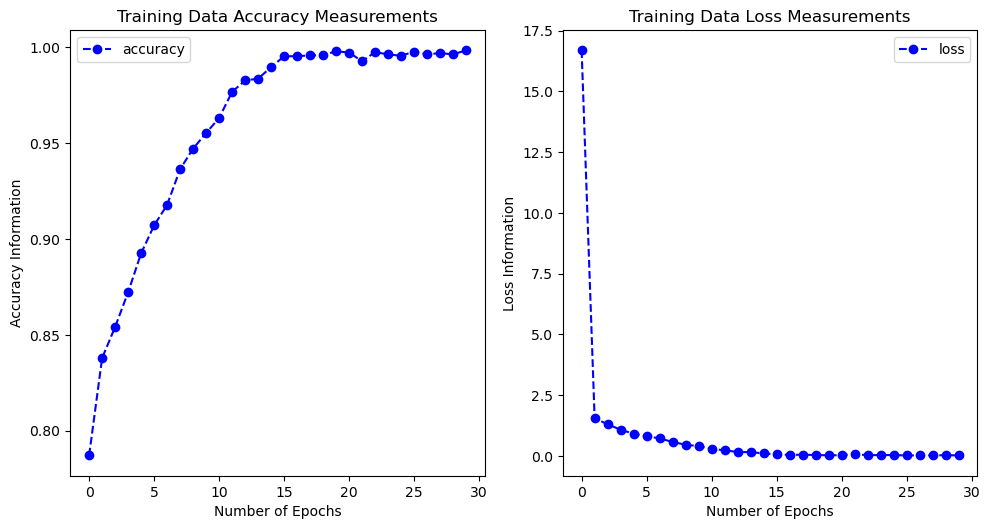

In [28]:
accuracy_and_loss_Plot(history)

In [29]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Confusion matrix
confusion_matrix = np.array([[11, 0, 0, 0, 0, 1],
                             [0, 20, 0, 0, 0, 1],
                             [0, 0, 25, 0, 0, 2],
                             [0, 0, 0, 19, 0, 0],
                             [0, 0, 0, 2, 19, 3],
                             [0, 0, 1, 2, 0, 14]])

# Calculate MAE, MSE, RMSE
actual = np.sum(confusion_matrix, axis=1)
predicted = np.sum(confusion_matrix, axis=0)

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 2.6666666666666665
Mean Squared Error (MSE): 10.0
Root Mean Squared Error (RMSE): 3.1622776601683795


## model for hardware implementation

In [30]:
import numpy as np
import os
import matplotlib.pyplot as plt

import cv2
from tqdm import tqdm
import io
import seaborn as sns




from sklearn.utils import shuffle # Shuffle arrays or sparse matrices in a consistent way
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.applications import DenseNet121
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard,ModelCheckpoint

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



import ipywidgets as widgets
from PIL import Image
from IPython.display import display, clear_output

In [31]:
labels = ['AD','CN','MCI','LMCI','EMCI','SMC']

In [32]:
X_train = [] #Training Dataset
Y_train = [] #Training Labels

image_size=150

for i in labels:
    folderPath = os.path.join(r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train', i)
    for j in tqdm(os.listdir(folderPath)):
        image = cv2.imread(os.path.join(folderPath, j))
        image = cv2.resize(image, (image_size, image_size))
        X_train.append(image)
        Y_train.append(i)
        
        
for i in labels:
    folderPath = os.path.join(r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train', i) # Join two or more pathname components
    for j in tqdm(os.listdir(folderPath)):
        image = cv2.imread(os.path.join(folderPath, j))
        image = cv2.resize(image, (image_size, image_size))
        X_train.append(image)
        Y_train.append(i)
        
# converted into array

Xtrain = np.array(X_train)
Ytrain = np.array(Y_train)

100%|████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<00:00, 2170.82it/s]


In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
# Set your image dimensions and other parameters
img_width, img_height = 150, 150  # Adjust as needed
input_shape = (img_width, img_height, 3)
batch_size = 16
epochs = 10

# Data augmentation to improve generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Set your dataset paths
train_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train'
test_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train'

# Create generators for training and validation data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),  # Adjusted target size
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),  # Adjusted target size
    batch_size=batch_size,
    class_mode='categorical')

model = Sequential()


model.add(Conv2D(128, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))

model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(6, activation='softmax'))  # Assuming 6 classes, adjust as needed


Found 497 images belonging to 7 classes.
Found 497 images belonging to 7 classes.


In [96]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 74, 74, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 72, 72, 128)       147584    
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 36, 36, 128)       0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 165888)            0         
                                                                 
 dense_11 (Dense)            (None, 30)               

In [97]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc')
]
model.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=METRICS)

In [98]:
tensorBoard = TensorBoard(log_dir="logs")
checkPoint = ModelCheckpoint("model_d.h5",
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_acc',
                             factor=0.3,
                             patience=2,
                             verbose=1,
                             mode='auto',
                            min_delta=0.001)

In [99]:
xtrain,xtest, Ytrain,ytest = train_test_split(Xtrain, Ytrain,test_size=0.12
                                              , random_state=42)

In [100]:
ytrain_new = []
ytest_new = []

for i in Ytrain:
    ytrain_new.append(labels.index(i))
ytrain = to_categorical(ytrain_new) 

for i in ytest:
    ytest_new.append(labels.index(i))

ytest = to_categorical(ytest_new)

In [101]:
plot_model(model, to_file='cnn.png', show_shapes=True, show_layer_names=True)

history=model.fit(xtrain, ytrain, epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30
22/22 [==============================] - 29s 1s/step - loss: 13.9942 - accuracy: 0.8057 - precision: 0.1882 - recall: 0.0501 - auc: 0.5136 - val_loss: 1.7906 - val_accuracy: 0.8333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5303
Epoch 2/30
22/22 [==============================] - 27s 1s/step - loss: 1.7888 - accuracy: 0.8333 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5300 - val_loss: 1.7843 - val_accuracy: 0.8333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5580
Epoch 3/30
22/22 [==============================] - 25s 1s/step - loss: 1.7668 - accuracy: 0.8329 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5671 - val_loss: 1.7697 - val_accuracy: 0.8305 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5637
Epoch 4/30
22/22 [==============================] - 25s 1s/step - loss: 1.7298 - accuracy: 0.8345 - precision: 0.6087 - recall: 0.0200 - auc: 0.5950 - val_loss: 1.7386 - val_accuracy: 0.8419 - val_

4/4 [==============================] - 1s 230ms/step
Accuracy: 0.7666666666666667


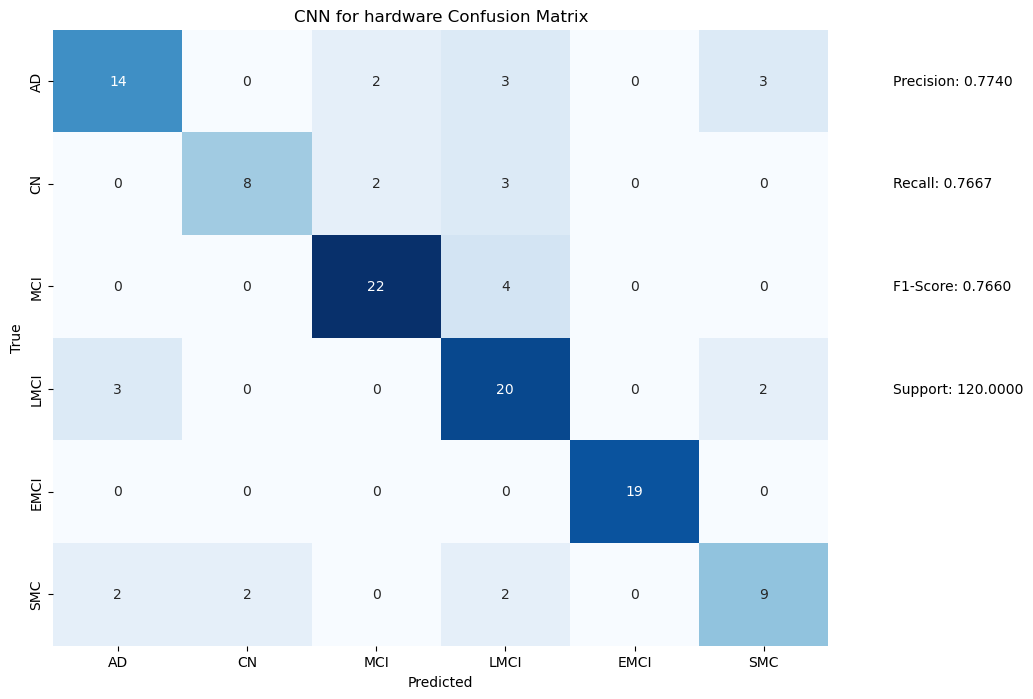

Precision: 0.7739865288220551
Recall: 0.7666666666666667
F1-score: 0.7660172748456751


In [102]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'labels' is a list of class labels
labels = ['AD', 'CN', 'MCI', 'LMCI', 'EMCI', 'SMC']

# Assuming 'xtest' and 'ytest' are your test data and labels
pred = model.predict(xtest)
pred = np.argmax(pred, axis=1)

actual_label = np.argmax(ytest, axis=1)

conf_matrix = confusion_matrix(actual_label, pred)
accuracy = accuracy_score(actual_label, pred)
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)

# Display overall metrics below the x-axis
report = classification_report(actual_label, pred, target_names=labels, output_dict=True)
overall_metrics = report['weighted avg']

# Display metrics below the x-axis
metrics_labels = ['Precision', 'Recall', 'F1-Score', 'Support']
metrics_values = [overall_metrics['precision'], overall_metrics['recall'], overall_metrics['f1-score'], overall_metrics['support']]

for i, metric in enumerate(metrics_labels):
    plt.text(len(labels) + 0.5, i + 0.5, f'{metric}: {metrics_values[i]:.4f}', verticalalignment='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN for hardware Confusion Matrix')
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(actual_label, pred, average='weighted')
recall = recall_score(actual_label, pred, average='weighted')
f1 = f1_score(actual_label, pred, average='weighted')

# Print precision, recall, and F1-score
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')



In [103]:
def accuracy_and_loss_Plot(modelData):
    
    fig=plt.figure(figsize=(10,10))
    
    plt.subplot(221)
    plt.plot(modelData.history["accuracy"], 'bo--',label='accuracy')
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy Information")
    #plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.subplot(222)
    plt.plot(modelData.history["loss"], 'bo--',label='loss')

    plt.title("Training Data Loss Measurements")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss Information")
    #plt.grid()
    plt.legend()
    plt.tight_layout()
 

C:\Users\HP\AppData\Local\Temp\ipykernel_20332\722281416.py:22: UserWarning:

The figure layout has changed to tight



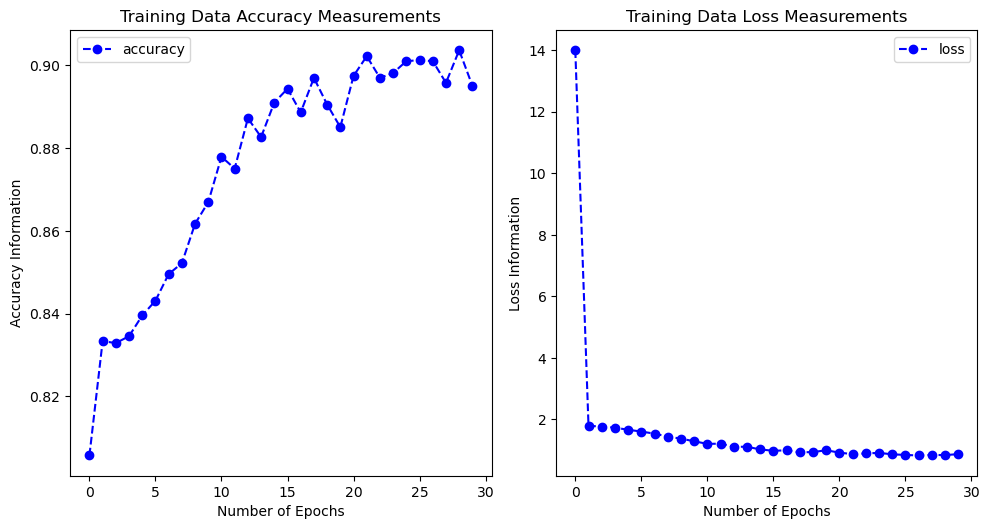

In [104]:
   accuracy_and_loss_Plot(history)

## Random forest Classification

100%|████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<00:00, 2174.97it/s]


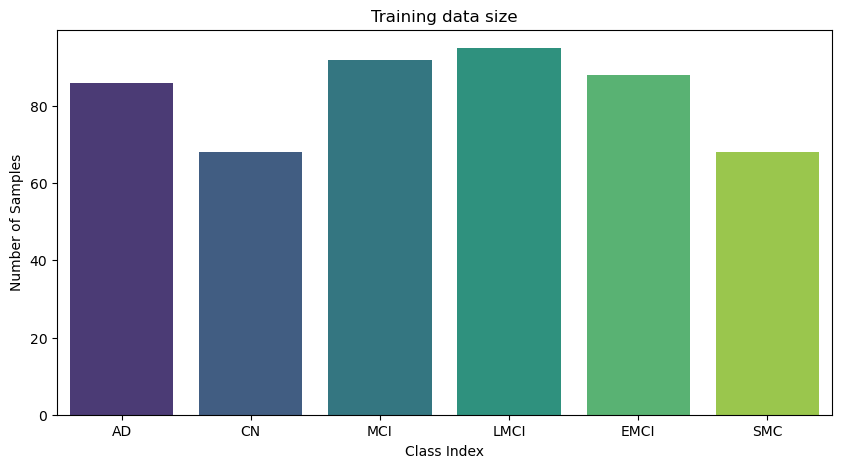

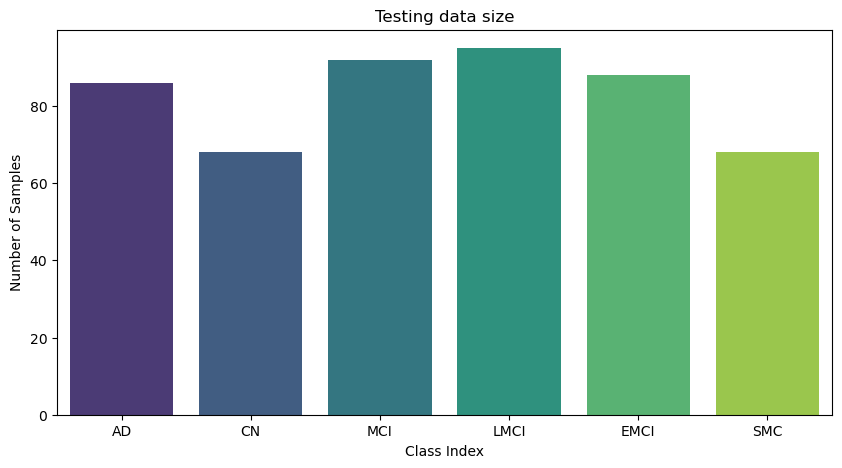

In [51]:
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt2
import seaborn as sns
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from tqdm import tqdm

# Set the paths to your training and testing data
train_data_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train'
test_data_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train'

# Define your class labels
class_labels = ['AD', 'CN', 'MCI', 'LMCI', 'EMCI', 'SMC']

# Function to load and preprocess images
def load_images(folder_path):
    images = []
    labels = []
    for label_index, label in enumerate(class_labels):
        label_path = os.path.join(folder_path, label)
        for filename in tqdm(os.listdir(label_path)):
            img_path = os.path.join(label_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (150, 150))  # Adjust the size as needed
            images.append(img.flatten())  # Flatten the image
            labels.append(label_index)
    return np.array(images), np.array(labels)

# Load training data
X_train, y_train = load_images(train_data_path)

# Load testing data
X_test, y_test = load_images(test_data_path)

# Visualize input data size with a bar plot
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, palette='viridis')
plt.title('Training data size')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.show()
plt.figure(figsize=(10, 5))
sns.countplot(x=y_test, palette='viridis')
plt.title('Testing data size')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.show()


In [52]:


# Initialize Random Forest classifier with regularization parameters
rf_classifier = RandomForestClassifier(n_estimators=20, 
                                       random_state=42,
                                       max_depth=5,          # Maximum depth of each tree
                                       min_samples_split=2,   # Minimum samples required to split an internal node
                                       min_samples_leaf=1,    # Minimum number of samples required to be at a leaf node
                                       max_features='sqrt')   # Number of features to consider when looking for the best split

# Train the classifier and monitor accuracy during training
train_accuracies = []
test_accuracies = []

for n_trees in range(1, 20):
    # Train the classifier with n_trees
    rf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf.fit(X_train, y_train)
    
    # Evaluate on training set
    y_train_pred = rf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Evaluate on test set
    y_test_pred = rf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plot accuracy over the number of trees


# Final model with optimal number of trees
rf_classifier = RandomForestClassifier(n_estimators=np.argmax(test_accuracies) + 1, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')



Accuracy: 1.0


  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

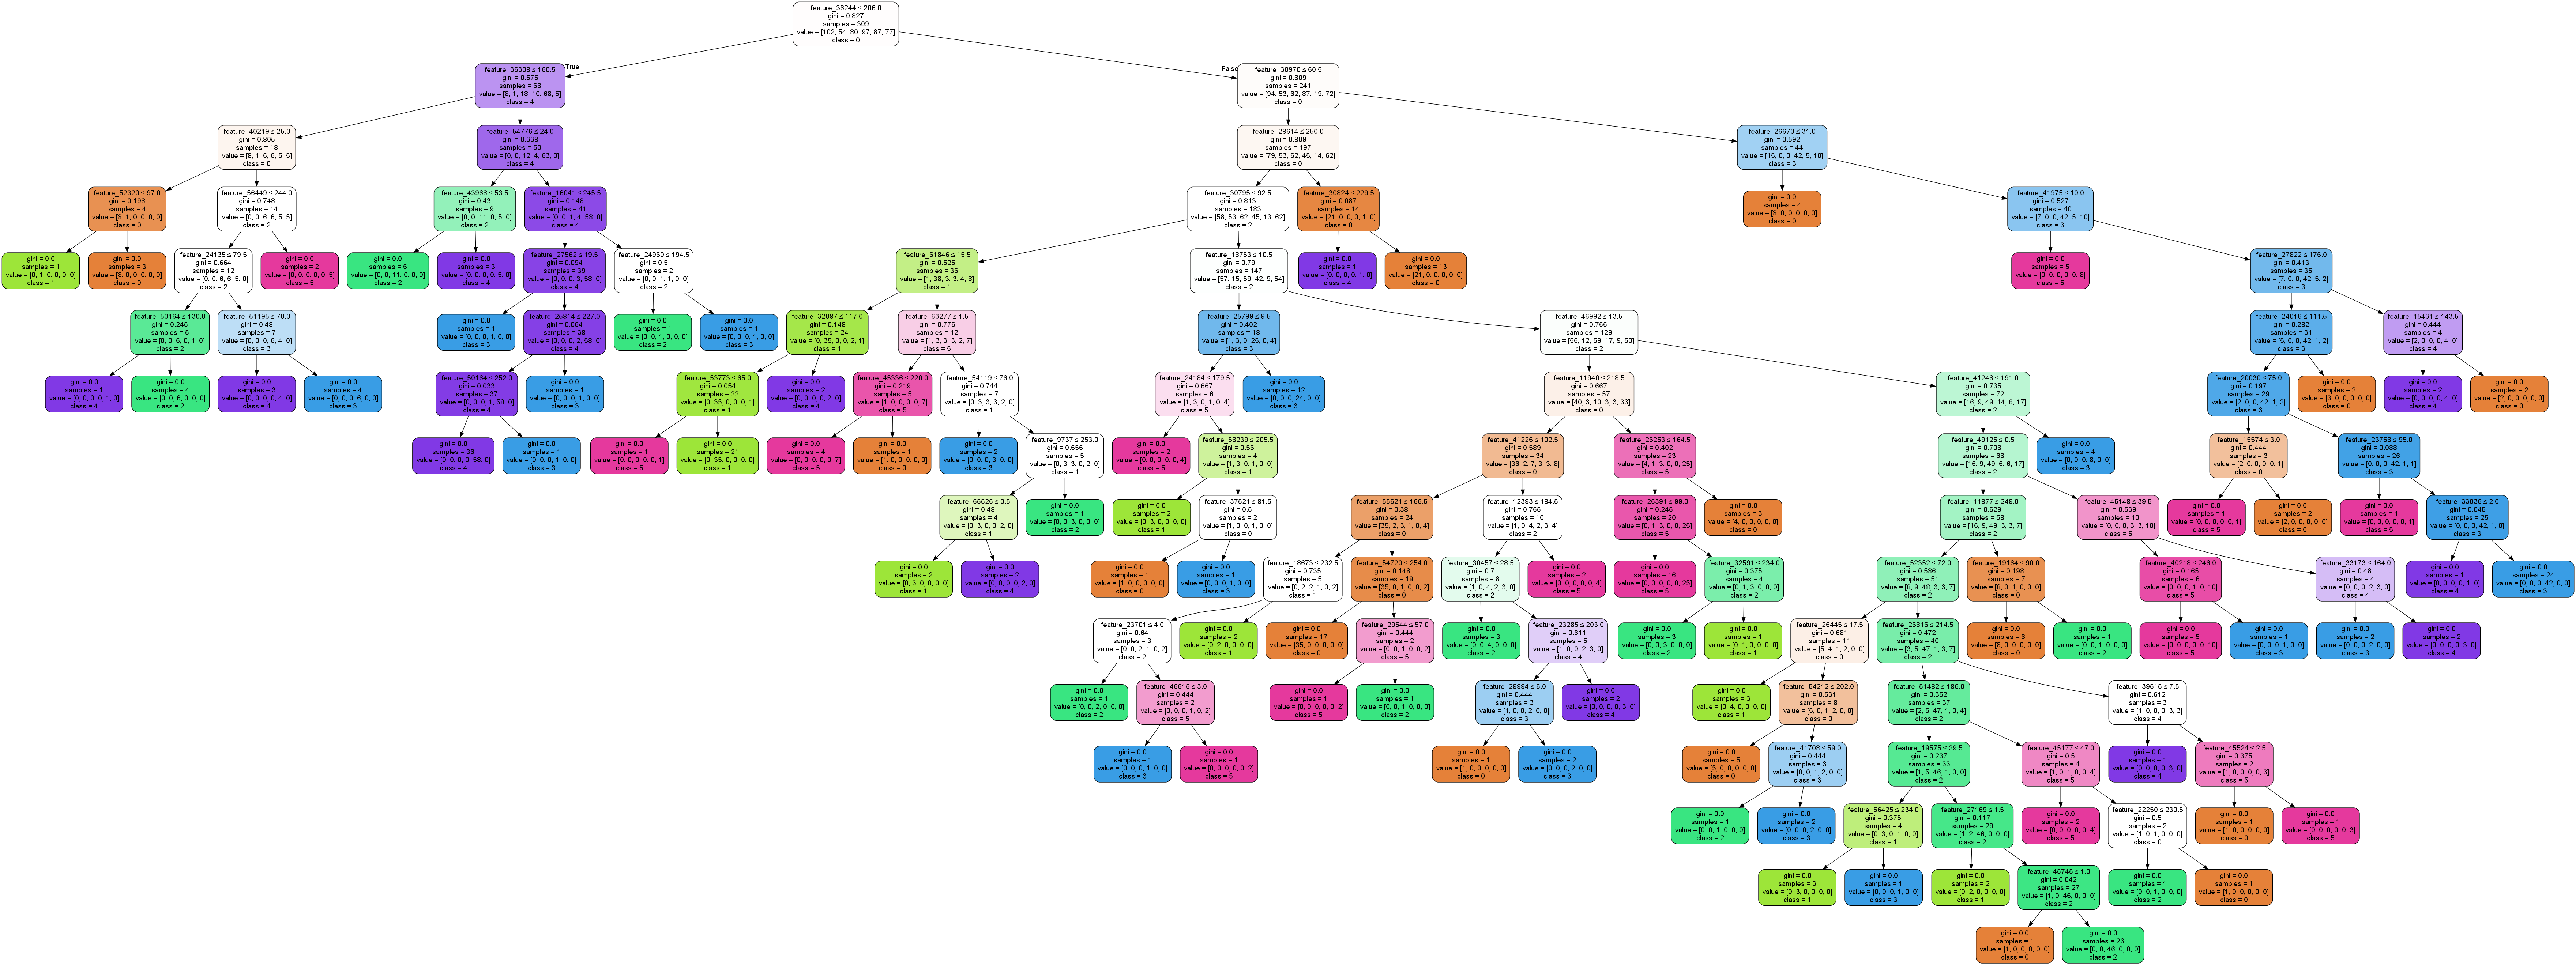

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:14<00:00,  1.27it/s]


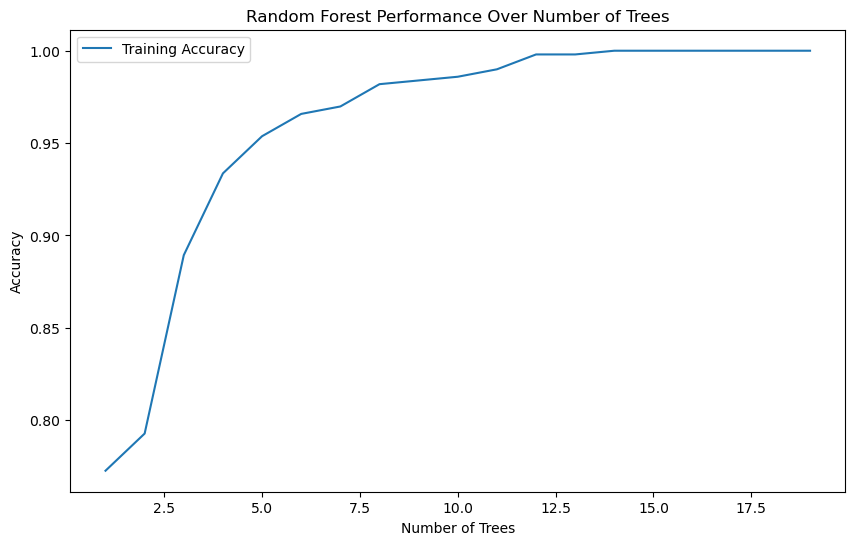

In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import Image, display
from tqdm import tqdm

# Assuming you have X_train, y_train, X_test, y_test defined



# Train the classifier and monitor accuracy during training
train_accuracies = []
test_accuracies = []

for n_trees in tqdm(range(1, 20)):
    # Train the classifier with n_trees
    rf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf.fit(X_train, y_train)
    
    # Visualize the first tree in the forest
    if n_trees == 1:
        tree_filename = f'tree_{n_trees}.dot'
        export_graphviz(rf.estimators_[0], out_file=tree_filename, 
                        feature_names=[f'feature_{i}' for i in range(X_train.shape[1])],
                        class_names=[str(c) for c in rf.classes_],
                        filled=True, rounded=True, special_characters=True)
        os.system(f'dot -Tpng {tree_filename} -o tree_{n_trees}.png')
        
        # Display the tree
        display(Image(filename=f'tree_{n_trees}.png'))

    # Evaluate on training set
    y_train_pred = rf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Evaluate on test set
    y_test_pred = rf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plot accuracy over the number of trees
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), train_accuracies, label='Training Accuracy')
plt.title('Random Forest Performance Over Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


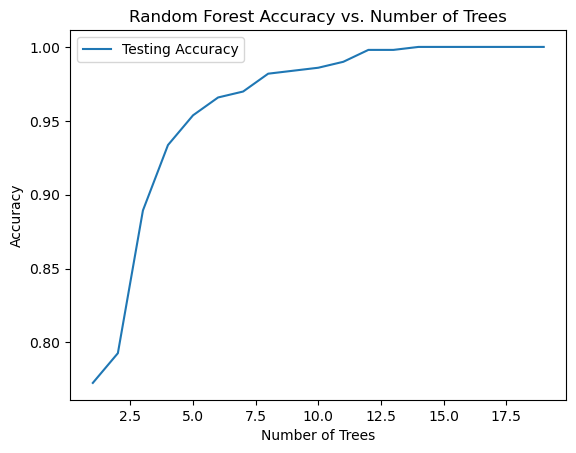

In [54]:
plt.plot(range(1, 20), test_accuracies, label='Testing Accuracy')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.show()



Text(0.5, 1.0, 'Confusion Matrix')

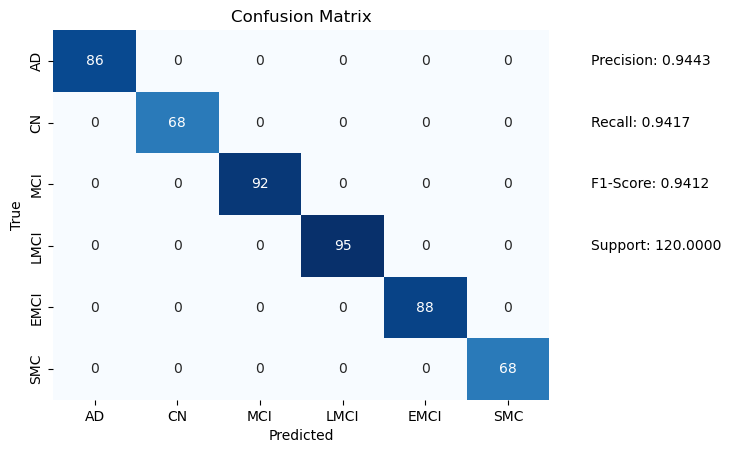

In [55]:

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
overall_metrics = report['weighted avg']

# Display metrics below the x-axis
metrics_labels = ['Precision', 'Recall', 'F1-Score', 'Support']
metrics_values = [overall_metrics['precision'], overall_metrics['recall'], overall_metrics['f1-score'], overall_metrics['support']]

for i, metric in enumerate(metrics_labels):
    plt.text(len(labels) + 0.5, i + 0.5, f'{metric}: {metrics_values[i]:.4f}', verticalalignment='center')
# Plot the confusion matrix using seaborn and matplotlib

# Confusion Matrix Plot
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')



Metrics for AD:
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Metrics for CN:
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Metrics for MCI:
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Metrics for LMCI:
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Metrics for EMCI:
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Metrics for SMC:
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


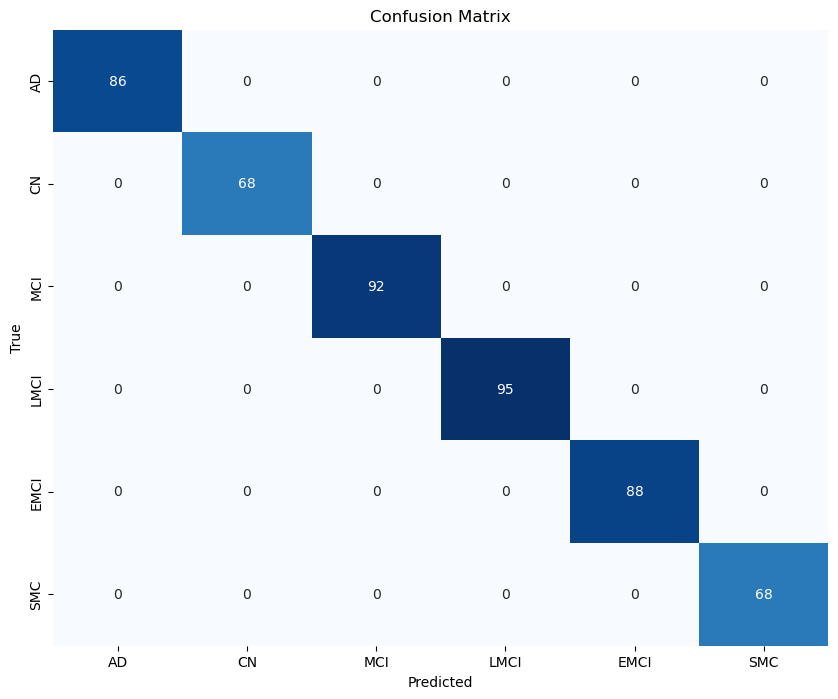

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'class_labels' is a list of class labels
class_labels = ['AD', 'CN', 'MCI', 'LMCI', 'EMCI', 'SMC']

# Assuming 'y_test' and 'y_pred' are your test labels and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Calculate precision, recall, and F1-score for each class
report = classification_report(y_test, y_pred, target_names=class_labels, output_dict=True)

# Print precision, recall, and F1-score for each class
for label in class_labels:
    class_metrics = report[label]
    print(f"\nMetrics for {label}:")
    print(f"Precision: {class_metrics['precision']:.4f}")
    print(f"Recall: {class_metrics['recall']:.4f}")
    print(f"F1-score: {class_metrics['f1-score']:.4f}")

plt.show()


## SVM

100%|████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<00:00, 3752.55it/s]


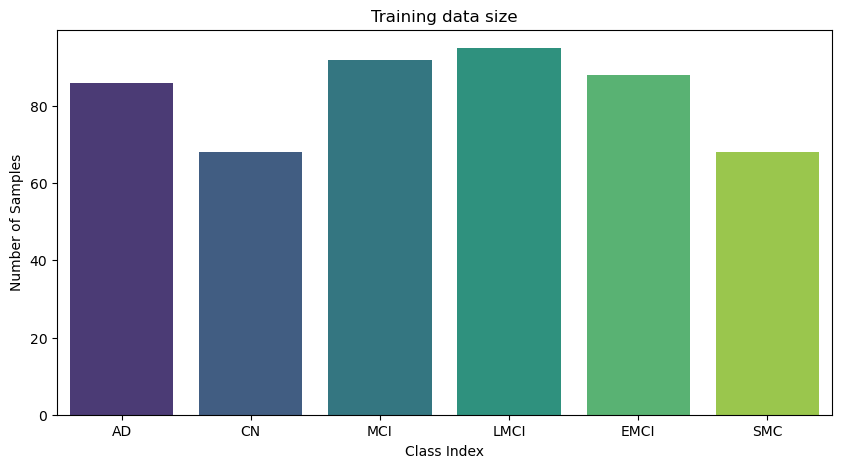

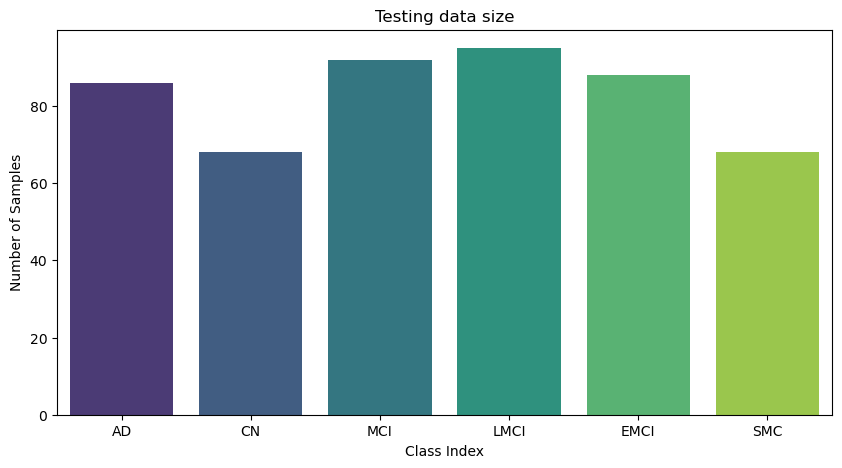

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import os
import numpy as np

# Set the paths to your training and testing data
train_data_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train'
test_data_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train'

# Define your class labels
class_labels = ['AD', 'CN', 'MCI', 'LMCI', 'EMCI', 'SMC']

# Function to load and preprocess images
def load_images(folder_path):
    images = []
    labels = []
    for label_index, label in enumerate(class_labels):
        label_path = os.path.join(folder_path, label)
        for filename in tqdm(os.listdir(label_path)):
            img_path = os.path.join(label_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (150, 150))  # Adjust the size as needed
            images.append(img.flatten())  # Flatten the image
            labels.append(label_index)
    return np.array(images), np.array(labels)

# Load training data
X_train, y_train = load_images(train_data_path)

# Load testing data
X_test, y_test = load_images(test_data_path)

# Visualize input data size with a bar plot
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, palette='viridis')
plt.title('Training data size')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.show()
plt.figure(figsize=(10, 5))
sns.countplot(x=y_test, palette='viridis')
plt.title('Testing data size')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.show()

In [58]:
import os
import numpy as np


# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the classifier and monitor accuracy during training
train_accuracies = []
test_accuracies = []

for C_value in np.logspace(-3, 3, 5):
    # Train the classifier with different C values
    svm = SVC(kernel='rbf', C=C_value, gamma='scale', random_state=42)
    svm.fit(X_train, y_train)
    
    # Evaluate on training set|
    y_train_pred = svm.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Evaluate on test set
    y_test_pred = svm.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)



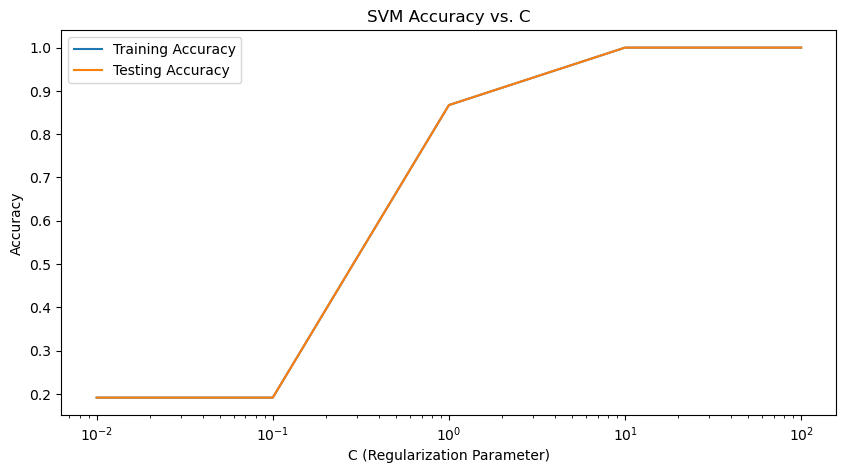

SVM Accuracy: 1.0


In [59]:
# Plot accuracy over different values of C
plt.figure(figsize=(10, 5))
plt.semilogx(np.logspace(-2, 2, 5), train_accuracies, label='Training Accuracy')
plt.semilogx(np.logspace(-2, 2, 5), test_accuracies, label='Testing Accuracy')
plt.title('SVM Accuracy vs. C')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Final model with optimal C value
optimal_C = np.logspace(-2, 2, 5)[np.argmax(test_accuracies)]
svm_classifier = SVC(kernel='rbf', C=optimal_C, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')




Precision (SVM): 1.0
Recall (SVM): 1.0
F1-score (SVM): 1.0


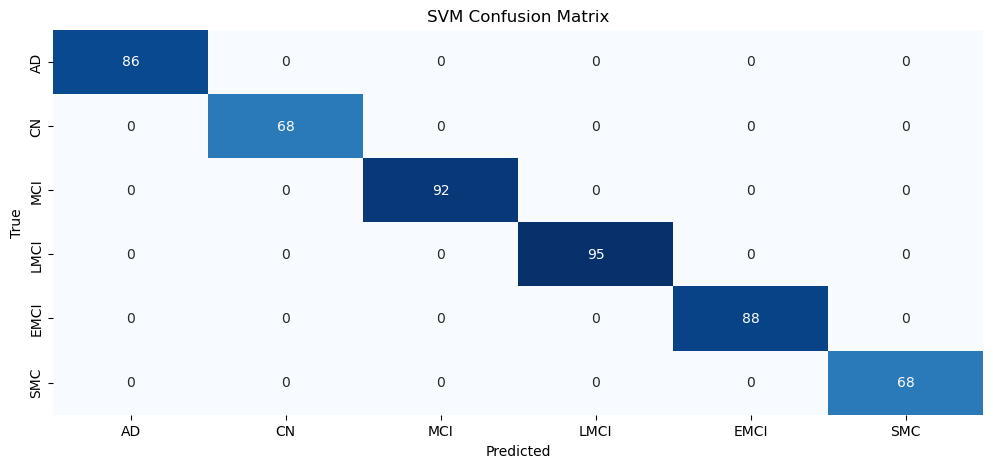

In [60]:
# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(12, 5))

# Confusion Matrix Plot
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')

# Per-Class Accuracy Plot
per_class_accuracy_svm = np.diag(cm_svm) / np.sum(cm_svm)

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Print precision, recall, and F1-score
print(f'Precision (SVM): {precision_svm}')
print(f'Recall (SVM): {recall_svm}')
print(f'F1-score (SVM): {f1_svm}')


Precision (SVM): 1.0
Recall (SVM): 1.0
F1-score (SVM): 1.0

Metrics for AD:
Precision (SVM): 1.0000
Recall (SVM): 1.0000
F1-score (SVM): 1.0000

Metrics for CN:
Precision (SVM): 1.0000
Recall (SVM): 1.0000
F1-score (SVM): 1.0000

Metrics for MCI:
Precision (SVM): 1.0000
Recall (SVM): 1.0000
F1-score (SVM): 1.0000

Metrics for LMCI:
Precision (SVM): 1.0000
Recall (SVM): 1.0000
F1-score (SVM): 1.0000

Metrics for EMCI:
Precision (SVM): 1.0000
Recall (SVM): 1.0000
F1-score (SVM): 1.0000

Metrics for SMC:
Precision (SVM): 1.0000
Recall (SVM): 1.0000
F1-score (SVM): 1.0000


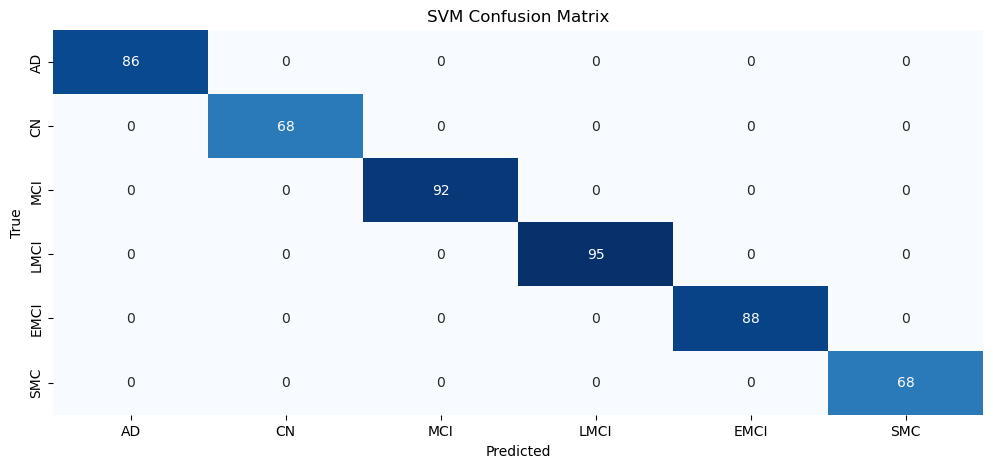

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'class_labels' is a list of class labels
class_labels = ['AD', 'CN', 'MCI', 'LMCI', 'EMCI', 'SMC']

# Assuming 'y_test' and 'y_pred_svm' are your test labels and predicted labels
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(12, 5))

# Confusion Matrix Plot
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')

# Per-Class Accuracy Plot
per_class_accuracy_svm = np.diag(cm_svm) / np.sum(cm_svm)

# Calculate precision, recall, and F1-score
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Print overall precision, recall, and F1-score
print(f'Precision (SVM): {precision_svm}')
print(f'Recall (SVM): {recall_svm}')
print(f'F1-score (SVM): {f1_svm}')

# Print precision, recall, and F1-score for each class
class_precision_svm = precision_score(y_test, y_pred_svm, average=None)
class_recall_svm = recall_score(y_test, y_pred_svm, average=None)
class_f1_svm = f1_score(y_test, y_pred_svm, average=None)

for i, label in enumerate(class_labels):
    print(f"\nMetrics for {label}:")
    print(f"Precision (SVM): {class_precision_svm[i]:.4f}")
    print(f"Recall (SVM): {class_recall_svm[i]:.4f}")
    print(f"F1-score (SVM): {class_f1_svm[i]:.4f}")

plt.show()




## CNN + RF


100%|████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<00:00, 4347.89it/s]


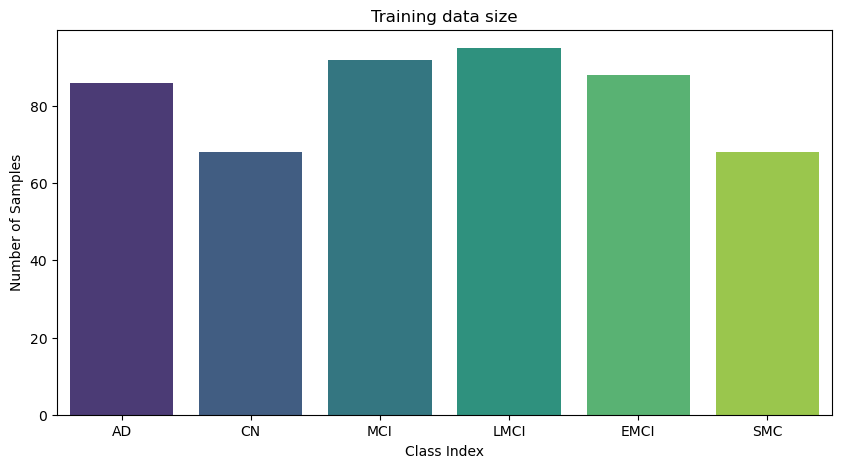

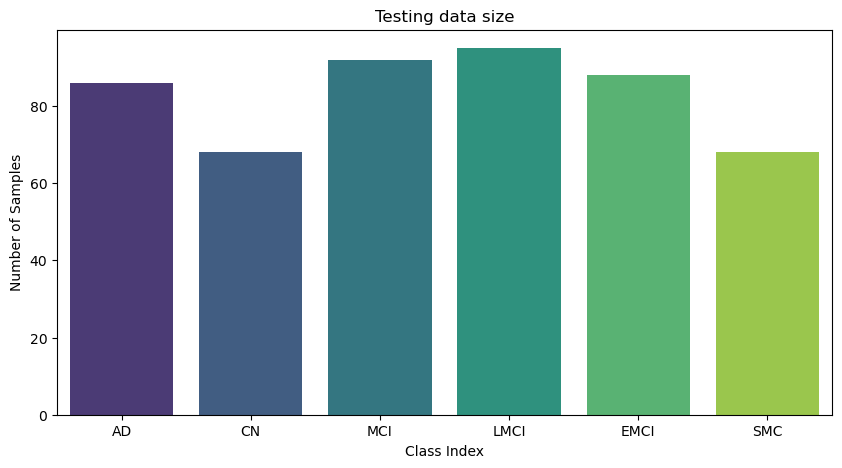

In [62]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from tqdm import tqdm
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

# Set the paths to your training and testing data
train_data_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train'
test_data_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train'

# Define your class labels
class_labels = ['AD', 'CN', 'MCI', 'LMCI', 'EMCI', 'SMC']

# Function to load and preprocess images
def load_images(folder_path):
    images = []
    labels = []
    for label_index, label in enumerate(class_labels):
        label_path = os.path.join(folder_path, label)
        for filename in tqdm(os.listdir(label_path)):
            img_path = os.path.join(label_path, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Assuming images are in BGR format
            img = cv2.resize(img, (150, 150))  # Adjust the size as needed
            images.append(img)
            labels.append(label_index)
    return np.array(images), np.array(labels)

# Load training data
X_train, y_train = load_images(train_data_path)

# Load testing data
X_test, y_test = load_images(test_data_path)

# Visualize input data size with a bar plot
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, palette='viridis')
plt.title('Training data size')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.show()
plt.figure(figsize=(10, 5))
sns.countplot(x=y_test, palette='viridis')
plt.title('Testing data size')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.show()

In [63]:


# Define and train the CNN model without validation split
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
cnn_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_filepath = 'best_model.h5'
model_checkpoint = ModelCheckpoint(checkpoint_filepath, save_best_only=True, monitor='val_loss', mode='min', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True, verbose=1)

history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=16,callbacks=[model_checkpoint, reduce_lr, early_stopping])

# Load the best model saved during training

# Extract CNN features for training and testing data
cnn_features_train = cnn_model.predict(X_train)
cnn_features_test = cnn_model.predict(X_test)



Epoch 1/20

32/32 [==============================] - 6s 154ms/step - loss: 16.6637 - accuracy: 0.1710 - lr: 1.0000e-04
Epoch 2/20
32/32 [==============================] - 5s 151ms/step - loss: 2.0423 - accuracy: 0.3018 - lr: 1.0000e-04
Epoch 3/20
32/32 [==============================] - 5s 149ms/step - loss: 1.6513 - accuracy: 0.3400 - lr: 1.0000e-04
Epoch 4/20
32/32 [==============================] - 5s 147ms/step - loss: 1.4995 - accuracy: 0.3964 - lr: 1.0000e-04
Epoch 5/20
32/32 [==============================] - 5s 147ms/step - loss: 1.4961 - accuracy: 0.3883 - lr: 1.0000e-04
Epoch 6/20
32/32 [==============================] - 5s 147ms/step - loss: 1.4095 - accuracy: 0.4044 - lr: 1.0000e-04
Epoch 7/20
32/32 [==============================] - 5s 150ms/step - loss: 1.3032 - accuracy: 0.4608 - lr: 1.0000e-04
Epoch 8/20
32/32 [==============================] - 5s 149ms/step - loss: 1.3375 - accuracy: 0.4145 - lr: 1.0000e-04
Epoch 9/20
32/32 [==============================] - 5s 148ms/s

32/32 [==============================] - 5s 148ms/step - loss: 1.1043 - accuracy: 0.5775 - lr: 1.0000e-04
Epoch 16/20
32/32 [==============================] - 5s 148ms/step - loss: 1.0519 - accuracy: 0.5775 - lr: 1.0000e-04
Epoch 17/20
32/32 [==============================] - 5s 151ms/step - loss: 0.9100 - accuracy: 0.6519 - lr: 1.0000e-04
Epoch 18/20
32/32 [==============================] - 5s 147ms/step - loss: 0.9848 - accuracy: 0.6197 - lr: 1.0000e-04
Epoch 19/20
32/32 [==============================] - 5s 149ms/step - loss: 0.8983 - accuracy: 0.6258 - lr: 1.0000e-04
Epoch 20/20
16/16 [==============================] - 1s 72ms/step


In [64]:

# Flatten the features for Random Forest input
cnn_features_train_flat = cnn_features_train.reshape(cnn_features_train.shape[0], -1)
cnn_features_test_flat = cnn_features_test.reshape(cnn_features_test.shape[0], -1)

# Define and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(cnn_features_train_flat, y_train)

# Predict using the Random Forest model
y_pred_rf = rf_model.predict(cnn_features_test_flat)


Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:


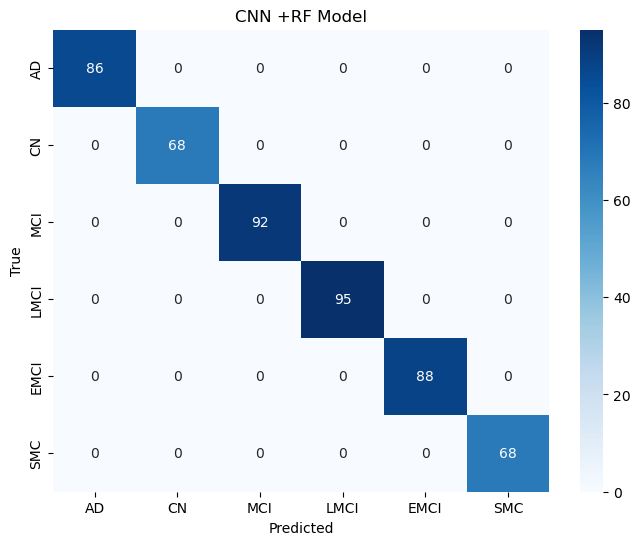

[[86  0  0  0  0  0]
 [ 0 68  0  0  0  0]
 [ 0  0 92  0  0  0]
 [ 0  0  0 95  0  0]
 [ 0  0  0  0 88  0]
 [ 0  0  0  0  0 68]]


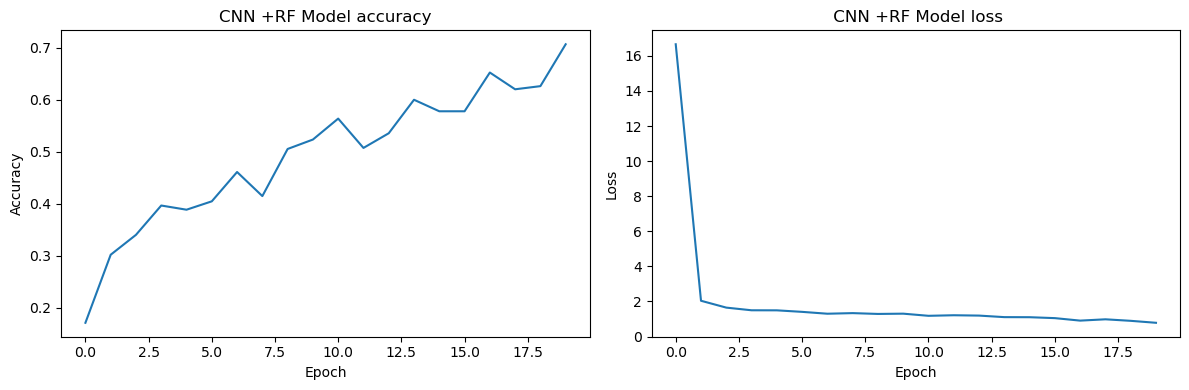

Precision (Random Forest+CNN): 1.0
Recall (Random Forest+CNN): 1.0
F1-score (Random Forest+CNN): 1.0


In [65]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Confusion Matrix:")
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('CNN +RF Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(conf_matrix_rf)

# Plot training accuracy and loss curves
plt.figure(figsize=(12, 4))

# Plot training accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('CNN +RF Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot training loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title(' CNN +RF Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print precision, recall, and F1-score
print(f'Precision (Random Forest+CNN): {precision_rf}')
print(f'Recall (Random Forest+CNN): {recall_rf}')
print(f'F1-score (Random Forest+CNN): {f1_rf}')


In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision_rf = precision_score(y_test, y_pred_rf, average=None)
recall_rf = recall_score(y_test, y_pred_rf, average=None)
f1_rf = f1_score(y_test, y_pred_rf, average=None)

# Print precision, recall, and F1-score for each class
for i, label in enumerate(class_labels):
    print(f"\nMetrics for {label}:")
    print(f"Precision (Random Forest+CNN): {precision_rf[i]:.4f}")
    print(f"Recall (Random Forest+CNN): {recall_rf[i]:.4f}")
    print(f"F1-score (Random Forest+CNN): {f1_rf[i]:.4f}")

# Overall metrics
print(f'\nOverall Precision (Random Forest+CNN): {precision_rf.mean():.4f}')
print(f'Overall Recall (Random Forest+CNN): {recall_rf.mean():.4f}')
print(f'Overall F1-score (Random Forest+CNN): {f1_rf.mean():.4f}')



Metrics for AD:
Precision (Random Forest+CNN): 1.0000
Recall (Random Forest+CNN): 1.0000
F1-score (Random Forest+CNN): 1.0000

Metrics for CN:
Precision (Random Forest+CNN): 1.0000
Recall (Random Forest+CNN): 1.0000
F1-score (Random Forest+CNN): 1.0000

Metrics for MCI:
Precision (Random Forest+CNN): 1.0000
Recall (Random Forest+CNN): 1.0000
F1-score (Random Forest+CNN): 1.0000

Metrics for LMCI:
Precision (Random Forest+CNN): 1.0000
Recall (Random Forest+CNN): 1.0000
F1-score (Random Forest+CNN): 1.0000

Metrics for EMCI:
Precision (Random Forest+CNN): 1.0000
Recall (Random Forest+CNN): 1.0000
F1-score (Random Forest+CNN): 1.0000

Metrics for SMC:
Precision (Random Forest+CNN): 1.0000
Recall (Random Forest+CNN): 1.0000
F1-score (Random Forest+CNN): 1.0000

Overall Precision (Random Forest+CNN): 1.0000
Overall Recall (Random Forest+CNN): 1.0000
Overall F1-score (Random Forest+CNN): 1.0000


## CNN and svm

In [75]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Function to read and preprocess images
def load_and_preprocess_data(folder_path):
    images = []
    labels = []

    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (128, 128))  # Resize images to a consistent size
            images.append(img)
            labels.append(label)

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Normalize pixel values to be between 0 and 1
    images = images / 255.0

    return images, labels

# Specify the path to your dataset
train_dataset_path = r"C:\Users\HP\FYP_SOFTWARE 2023\CODE AND DATASETS\2_LEVEL_DTCWT OUTPUT"
test_dataset_path = r"C:\Users\HP\FYP_SOFTWARE 2023\CODE AND DATASETS\2_LEVEL_DTCWT OUTPUT"

# Load and preprocess the training data
X_train, y_train = load_and_preprocess_data(train_dataset_path)

# Load and preprocess the testing data
X_test, y_test = load_and_preprocess_data(test_dataset_path)

# Encoding labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [76]:




# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build a CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')  # Assuming 6 classes, adjust as needed
])

cnn_model.summary()

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = cnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

# Extract features from intermediate layer of the CNN
cnn_features_model = Sequential(cnn_model.layers[:-1])  # Remove output layer
X_train_features = cnn_features_model.predict(X_train)
X_val_features = cnn_features_model.predict(X_val)
X_test_features = cnn_features_model.predict(X_test)

# Train SVM classifier on the features
# Train SVM classifier on the features with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)  # You can adjust C parameter as needed
svm_model.fit(X_train_features.reshape(len(X_train_features), -1), y_train)

# Evaluate the SVM model on the test set
svm_accuracy = svm_model.score(X_test_features.reshape(len(X_test_features), -1), y_test)



# Compute confusion matrix


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 14, 14, 64)       

In [77]:
print(f"SVM Test Accuracy: {svm_accuracy}")

# Generate predictions for the test set
svm_predictions = svm_model.predict(X_test_features.reshape(len(X_test_features), -1))

SVM Test Accuracy: 0.9154929577464789


In [78]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'labels' is a list of class labels
labels = ['CN','EMCI','MCI','LMCI','SMC','AD']  # Define your labels here

# Assuming 'y_test' and 'svm_predictions' are your test labels and predicted labels
cm = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Display metrics below the x-axis
report = classification_report(y_test, svm_predictions, target_names=labels, output_dict=True)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVM Classifier')
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming 'y_test' and 'y_pred_cnn_svm' are your test labels and predicted labels from the CNN + SVM model
precision_cnn_svm = precision_score(y_test, svm_predictions, average='weighted')
recall_cnn_svm = recall_score(y_test, svm_predictions, average='weighted')
f1_cnn_svm = f1_score(y_test, svm_predictions, average='weighted')

# Print precision, recall, and F1-score
print(f'Precision (CNN + SVM): {precision_cnn_svm}')
print(f'Recall (CNN + SVM): {recall_cnn_svm}')
print(f'F1-score (CNN + SVM): {f1_cnn_svm}')



Metrics for CN:
Precision: 0.8810
Recall: 0.8605
F1-score: 0.8706

Metrics for EMCI:
Precision: 0.8873
Recall: 0.9265
F1-score: 0.9065

Metrics for MCI:
Precision: 0.9556
Recall: 0.9773
F1-score: 0.9663

Metrics for LMCI:
Precision: 0.9032
Recall: 0.8842
F1-score: 0.8936

Metrics for SMC:
Precision: 0.9368
Recall: 0.9674
F1-score: 0.9519

Metrics for AD:
Precision: 0.9219
Recall: 0.8676
F1-score: 0.8939

Overall metrics:
Precision (CNN + SVM): 0.9152
Recall (CNN + SVM): 0.9155
F1-score (CNN + SVM): 0.9151


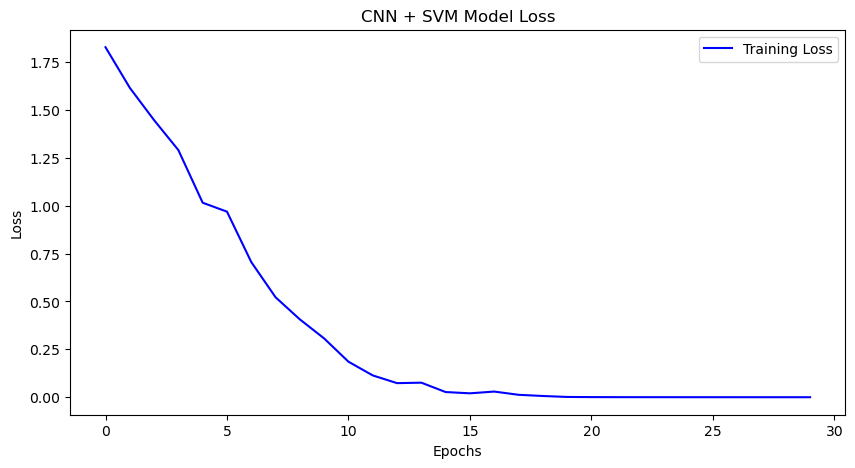

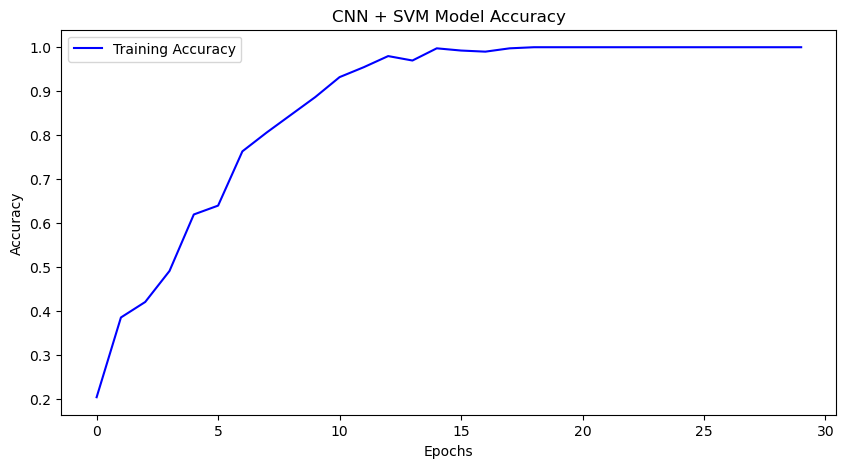

In [79]:
# Plot loss and accuracy of CNN model
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.title('CNN + SVM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.title('CNN + SVM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


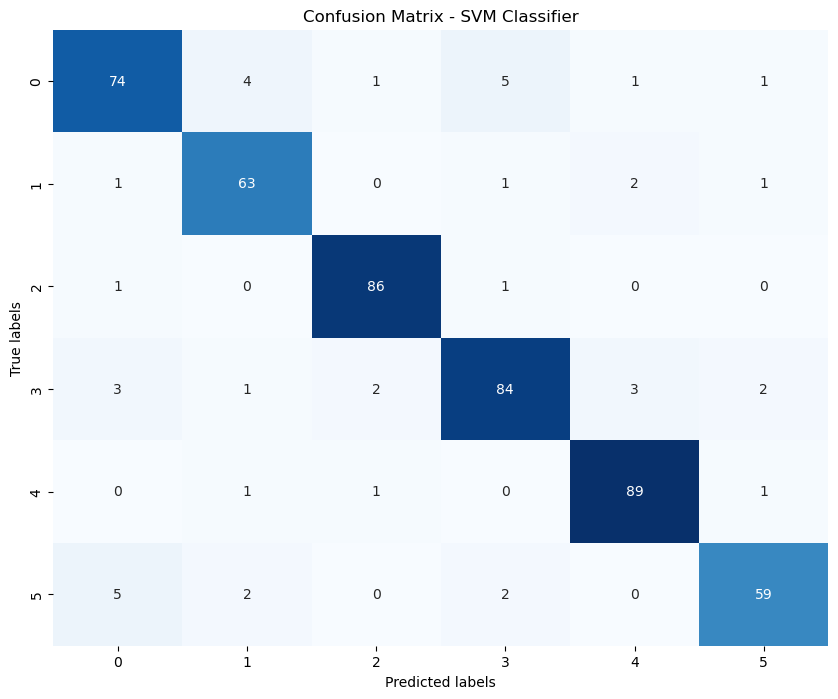


Metrics for CN:
Precision: 0.8810
Recall: 0.8605
F1-score: 0.8706

Metrics for EMCI:
Precision: 0.8873
Recall: 0.9265
F1-score: 0.9065

Metrics for MCI:
Precision: 0.9556
Recall: 0.9773
F1-score: 0.9663

Metrics for LMCI:
Precision: 0.9032
Recall: 0.8842
F1-score: 0.8936

Metrics for SMC:
Precision: 0.9368
Recall: 0.9674
F1-score: 0.9519

Metrics for AD:
Precision: 0.9219
Recall: 0.8676
F1-score: 0.8939

Overall metrics:
Precision (CNN + SVM): 0.9152
Recall (CNN + SVM): 0.9155
F1-score (CNN + SVM): 0.9151


In [80]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'labels' is a list of class labels
labels = ['CN', 'EMCI', 'MCI', 'LMCI', 'SMC', 'AD']

# Assuming 'y_test' and 'svm_predictions' are your test labels and predicted labels
cm = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Display metrics below the x-axis
report = classification_report(y_test, svm_predictions, target_names=labels, output_dict=True)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVM Classifier')
plt.show()

# Print precision, recall, and F1-score for each class
for label in labels:
    class_precision = report[label]['precision']
    class_recall = report[label]['recall']
    class_f1_score = report[label]['f1-score']
    print(f"\nMetrics for {label}:")
    print(f"Precision: {class_precision:.4f}")
    print(f"Recall: {class_recall:.4f}")
    print(f"F1-score: {class_f1_score:.4f}")

# Overall precision, recall, and F1-score
precision_cnn_svm = report['weighted avg']['precision']
recall_cnn_svm = report['weighted avg']['recall']
f1_cnn_svm = report['weighted avg']['f1-score']

print("\nOverall metrics:")
print(f"Precision (CNN + SVM): {precision_cnn_svm:.4f}")
print(f"Recall (CNN + SVM): {recall_cnn_svm:.4f}")
print(f"F1-score (CNN + SVM): {f1_cnn_svm:.4f}")


## ANN

In [81]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Function to read and preprocess images
def load_and_preprocess_data(folder_path):
    images = []
    labels = []

    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (128, 128))  # Resize images to a consistent size
            images.append(img)
            labels.append(label)

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)
    print(len(images))
    print(len(labels))


    # Normalize pixel values to be between 0 and 1
    images = images / 255.0

    # Encode labels
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    # Convert labels to one-hot encoding
    labels = to_categorical(labels)

    return images, labels

In [82]:

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    # Set the coordinates for the layers
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Create a Directed Graph
    G = nx.DiGraph()

    # Add nodes and edges for each layer
    for i, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for j in range(layer_size):
            G.add_node((i, j), pos=(left + i*h_spacing, layer_top - j*v_spacing))
            if i > 0:
                for k in range(layer_sizes[i-1]):
                    w = model.layers[i-1].get_weights()[0][k, j]  # Get weight
                    G.add_edge((i-1, k), (i, j), weight=w)

    # Draw nodes
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, ax=ax, with_labels=False, node_size=10, node_color='skyblue', font_size=8, font_color='black')

    # Draw edges with weights
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax, font_color='red', font_size=8)


497
497
497
497
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                1048640   
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 6)                 198       
                                                                 
Total params: 1050918 (4.01 MB)
Trainable params: 1050918 (4.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
13/13 [==============================] - 1s 43ms/step - loss: 2.0018 - accuracy: 0.2569 - val_loss: 1.7755 - val_accuracy: 0.2200
Epoch 2/30
13/13 [==============================] - 0s 23ms/step - loss: 1.4282 - accuracy: 0.4358 - val_loss: 1.7082 - val

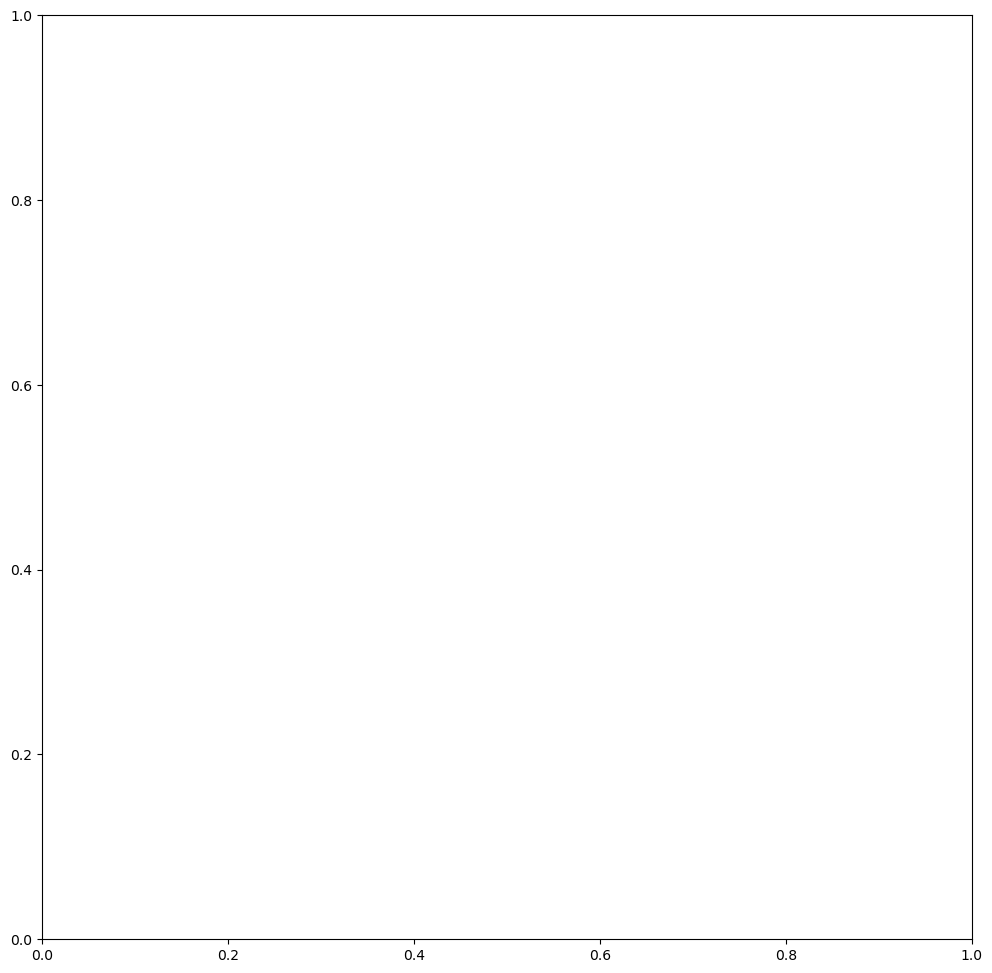

In [83]:
import matplotlib.pyplot as plt
import networkx as nx

# Specify the path to your dataset
train_dataset_path = r"C:\Users\HP\FYP_SOFTWARE 2023\CODE AND DATASETS\2_LEVEL_DTCWT OUTPUT"
test_dataset_path = r"C:\Users\HP\FYP_SOFTWARE 2023\CODE AND DATASETS\2_LEVEL_DTCWT OUTPUT"

# Load and preprocess the training data
X_train, y_train = load_and_preprocess_data(train_dataset_path)

# Load and preprocess the testing data
X_test, y_test = load_and_preprocess_data(test_dataset_path)

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Flatten the images
X_train_flat = X_train.reshape(-1, 128 * 128)
X_val_flat = X_val.reshape(-1, 128 * 128)
X_test_flat = X_test.reshape(-1, 128 * 128)

# Build a simple ANN model
model = Sequential()
model.add(Dense(64, input_dim=128 * 128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))  # Assuming 6 classes, adjust as needed
model.summary()
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fig, ax = plt.subplots(figsize=(12, 12))

# Draw the neural network




# Train the model
history = model.fit(X_train_flat, y_train, epochs=30, batch_size=32, validation_data=(X_val_flat, y_val))

# Evaluate the model on the test set
y_pred = model.predict(X_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Test Accuracy: {accuracy}")





Overall Metrics:
Precision: 0.91
Recall: 0.91
F1 Score: 0.91


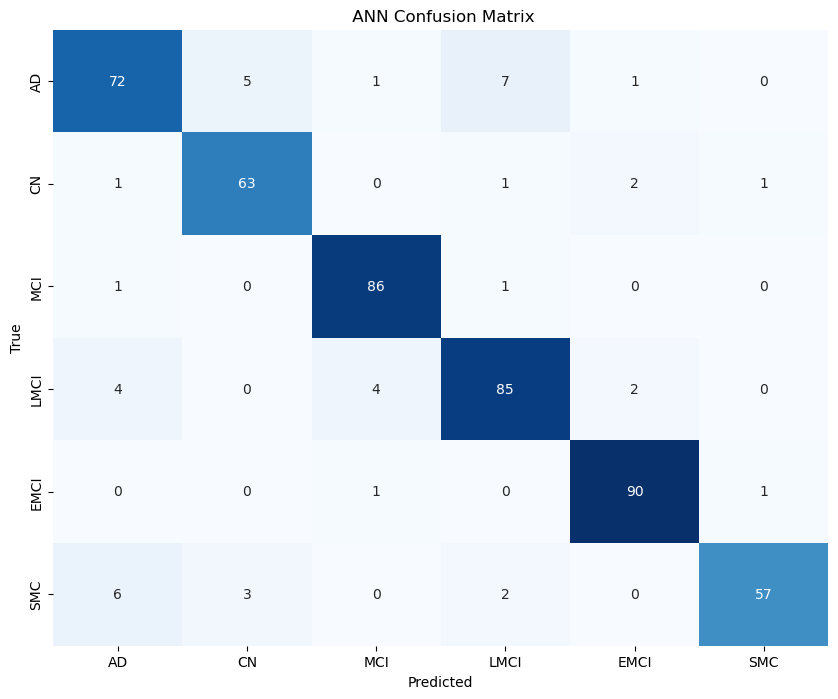

Confusion Matrix:
[[72  5  1  7  1  0]
 [ 1 63  0  1  2  1]
 [ 1  0 86  1  0  0]
 [ 4  0  4 85  2  0]
 [ 0  0  1  0 90  1]
 [ 6  3  0  2  0 57]]


In [84]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'labels' is a list of class labels
labels =  ['AD', 'CN', 'MCI', 'LMCI', 'EMCI', 'SMC']

# Assuming 'y_true_classes' and 'y_pred_classes' are your true and predicted labels

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)

# Calculate and display overall precision, recall, and F1-score
report = classification_report(y_true_classes, y_pred_classes, target_names=labels, output_dict=True)
overall_metrics = report['weighted avg']

print("Overall Metrics:")
print(f"Precision: {overall_metrics['precision']:.2f}")
print(f"Recall: {overall_metrics['recall']:.2f}")
print(f"F1 Score: {overall_metrics['f1-score']:.2f}")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(' ANN Confusion Matrix')
plt.show()

# Print the complete confusion matrix
print("Confusion Matrix:")
print(conf_matrix)



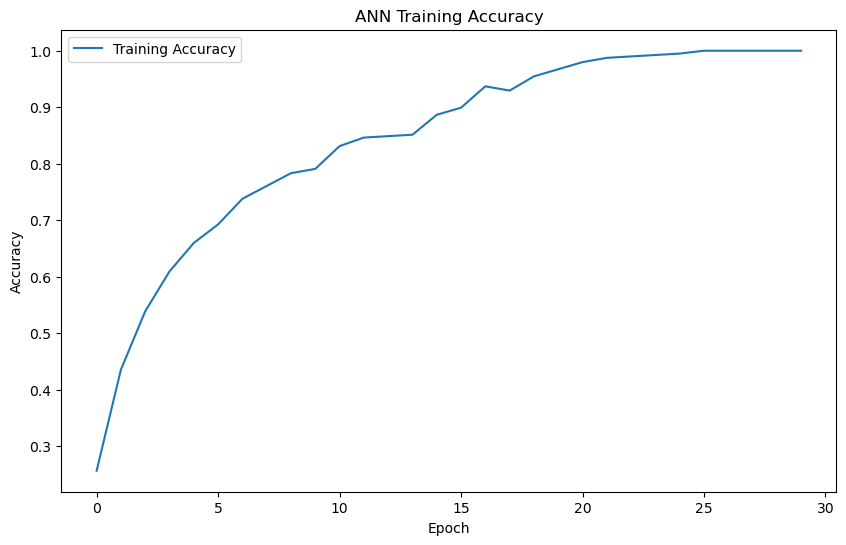

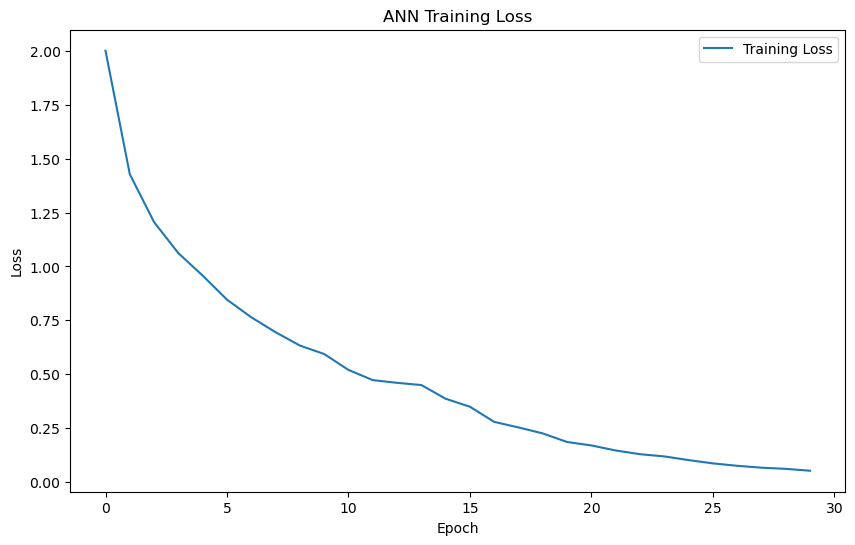

In [85]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('ANN Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('ANN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## data in form of vector in excel format


In [86]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def convert_images_to_dataframe(directory, img_size=(28, 28)):
    data = []

    for filename in os.listdir(directory):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            image_path = os.path.join(directory, filename)
            img = load_img(image_path, target_size=img_size, color_mode='grayscale')
            img_array = img_to_array(img).reshape(-1)  # Flatten the image data
            data.append(img_array)

    df = pd.DataFrame(data)
    return df

def save_to_excel(dataframe, excel_path):
    dataframe.to_excel(excel_path, index=False)

if __name__ == "__main__":
    image_directory = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train'
    excel_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train\images_data.xlsx'

    # Convert images to dataframe
    image_data = convert_images_to_dataframe(image_directory)

    # Save dataframe to Excel
    save_to_excel(image_data, excel_path)


In [87]:
import matplotlib.pyplot as plt
import networkx as nx
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Train the model
exe_data = model.fit(X_train_flat, y_train, epochs=30, batch_size=16, validation_data=(X_val_flat, y_val))
# Evaluate the model on the test set

y_pred = model.predict(X_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Test Accuracy: {accuracy}")

Epoch 1/30
25/25 [==============================] - 1s 28ms/step - loss: 0.0551 - accuracy: 1.0000 - val_loss: 1.1910 - val_accuracy: 0.5800
Epoch 2/30
25/25 [==============================] - 1s 26ms/step - loss: 0.0382 - accuracy: 1.0000 - val_loss: 1.2938 - val_accuracy: 0.5600
Epoch 3/30
25/25 [==============================] - 1s 26ms/step - loss: 0.0305 - accuracy: 1.0000 - val_loss: 1.1859 - val_accuracy: 0.6100
Epoch 4/30
25/25 [==============================] - 1s 21ms/step - loss: 0.0242 - accuracy: 1.0000 - val_loss: 1.2606 - val_accuracy: 0.5900
Epoch 5/30
25/25 [==============================] - 0s 18ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 1.2972 - val_accuracy: 0.5800
Epoch 6/30
25/25 [==============================] - 0s 18ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 1.2929 - val_accuracy: 0.6000
Epoch 7/30
25/25 [==============================] - 0s 18ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 1.2754 - val_accuracy: 0.5700
Epoch 8/30
25

In [91]:


model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                1048640   
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 6)                 198       
                                                                 
Total params: 1050918 (4.01 MB)
Trainable params: 1050918 (4.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


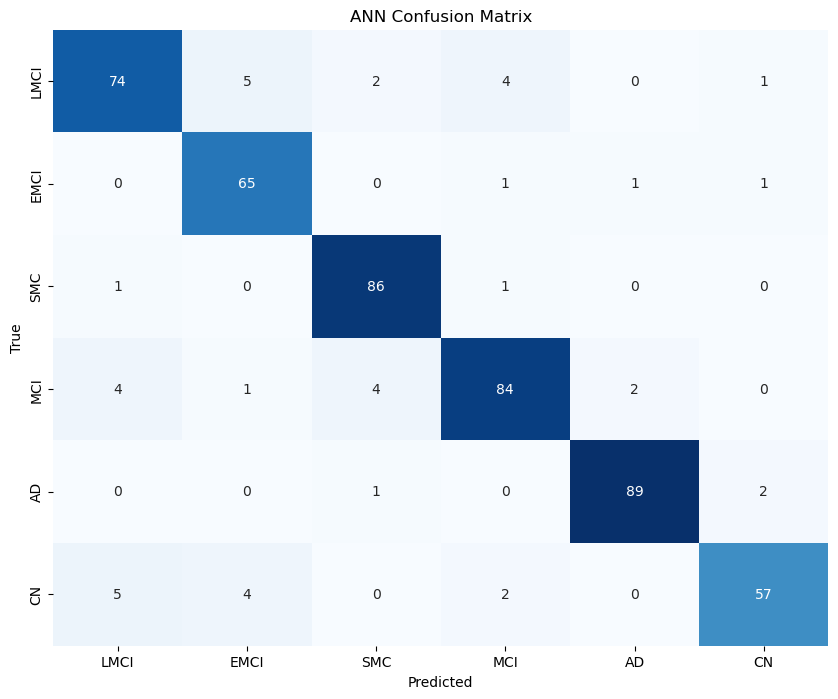

Overall Metrics:
Precision: 0.91
Recall: 0.91
F1 Score: 0.91


In [92]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'labels' is a list of class labels
labels = ['LMCI', 'EMCI', 'SMC', 'MCI', 'AD', 'CN']

# Assuming 'y_true_classes' and 'y_pred_classes' are your true and predicted labels
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ANN Confusion Matrix')
plt.show()

# Print precision, recall, and F1-score
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Overall Metrics:")
print(f"Precision: {np.mean(precision):.2f}")
print(f"Recall: {np.mean(recall):.2f}")
print(f"F1 Score: {np.mean(f1_score):.2f}")


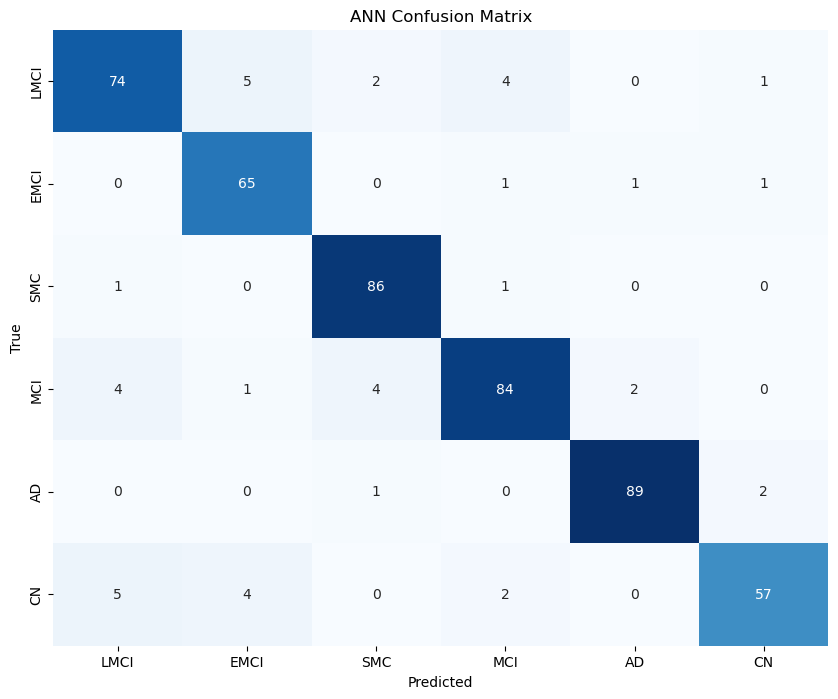

Metrics for Each Class:

Metrics for LMCI:
Precision: 0.8810
Recall: 0.8605
F1-score: 0.8706

Metrics for EMCI:
Precision: 0.8667
Recall: 0.9559
F1-score: 0.9091

Metrics for SMC:
Precision: 0.9247
Recall: 0.9773
F1-score: 0.9503

Metrics for MCI:
Precision: 0.9130
Recall: 0.8842
F1-score: 0.8984

Metrics for AD:
Precision: 0.9674
Recall: 0.9674
F1-score: 0.9674

Metrics for CN:
Precision: 0.9344
Recall: 0.8382
F1-score: 0.8837

Overall Metrics:
Precision (Average): 0.9145
Recall (Average): 0.9139
F1-score (Average): 0.9132


In [93]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'labels' is a list of class labels
labels = ['LMCI', 'EMCI', 'SMC', 'MCI', 'AD', 'CN']

# Assuming 'y_true_classes' and 'y_pred_classes' are your true and predicted labels
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ANN Confusion Matrix')
plt.show()

# Print precision, recall, and F1-score for each class
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Metrics for Each Class:")
for i, label in enumerate(labels):
    print(f"\nMetrics for {label}:")
    print(f"Precision: {precision[i]:.4f}")
    print(f"Recall: {recall[i]:.4f}")
    print(f"F1-score: {f1_score[i]:.4f}")

# Overall metrics
print("\nOverall Metrics:")
print(f"Precision (Average): {np.mean(precision):.4f}")
print(f"Recall (Average): {np.mean(recall):.4f}")
print(f"F1-score (Average): {np.mean(f1_score):.4f}")


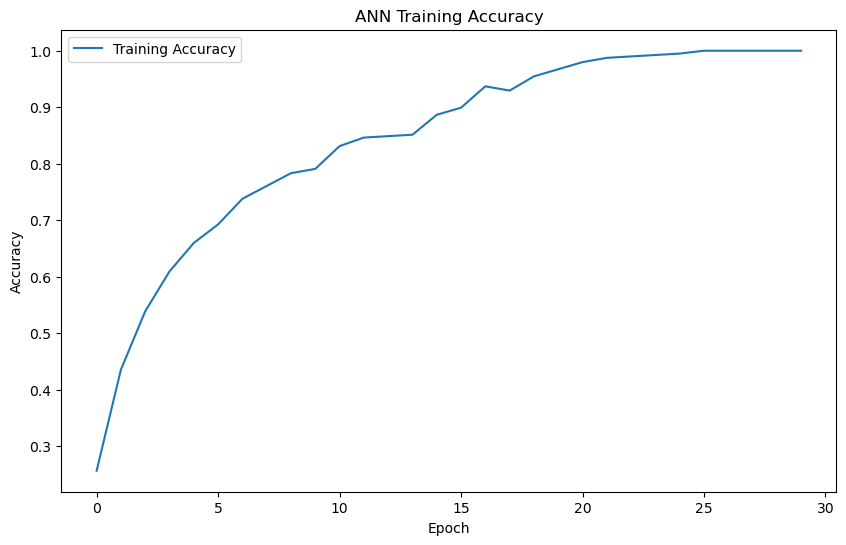

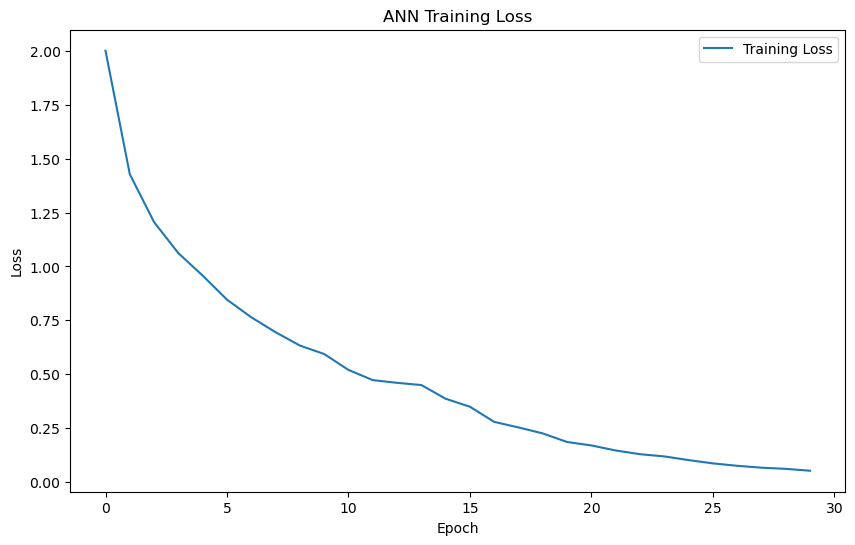

In [90]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('ANN Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('ANN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## ANN + RF


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Function to read and preprocess images
def load_and_preprocess_data(folder_path):
    images = []
    labels = []

    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (128, 128))  # Resize images to a consistent size
            images.append(img)
            labels.append(label)

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Normalize pixel values to be between 0 and 1
    images = images / 255.0

    return images, labels

# Specify the path to your dataset
train_dataset_path = r"C:\Users\HP\FYP_SOFTWARE 2023\CODE AND DATASETS\2_LEVEL_DTCWT OUTPUT"
test_dataset_path = r"C:\Users\HP\FYP_SOFTWARE 2023\CODE AND DATASETS\2_LEVEL_DTCWT OUTPUT"

# Load and preprocess the training data
X_train, y_train = load_and_preprocess_data(train_dataset_path)

# Load and preprocess the testing data
X_test, y_test = load_and_preprocess_data(test_dataset_path)

# Encoding labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Flatten the images
X_train_flat = X_train.reshape(-1, 128 * 128)
X_val_flat = X_val.reshape(-1, 128 * 128)
X_test_flat = X_test.reshape(-1, 128 * 128)


In [2]:

# Build a simple ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=128 * 128, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(6, activation='softmax'))  # Assuming 6 classes, adjust as needed
ann_model.summary()

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the ANN model
history=ann_model.fit(X_train_flat, y_train, epochs=30, batch_size=32, validation_data=(X_val_flat, y_val))

# Extract features from hidden layers of the ANN
hidden_layer_model = Sequential(ann_model.layers[:-1])  # Remove output layer
X_train_features = hidden_layer_model.predict(X_train_flat)
X_val_features = hidden_layer_model.predict(X_val_flat)
X_test_features = hidden_layer_model.predict(X_test_flat)

# Train Random Forest classifier on the features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# Evaluate the RF model on the test set
rf_accuracy = rf_model.score(X_test_features, y_test)
print(f"Random Forest Test Accuracy: {rf_accuracy}")



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1048640   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 1050918 (4.01 MB)
Trainable params: 1050918 (4.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Epoch 1/30


13/13 [==============================] - 1s 36ms/step - loss: 2.0354 - accuracy: 0.2670 - val_loss: 2.0530 - val_accuracy: 0.1900
Epoch 2/30
13/13 [==============================] - 0s 21ms/step - loss: 1.4645 - accuracy: 0.4383 - val_loss: 1.5123 - val_accuracy: 0.3

Random Forest Test Accuracy: 0.9195171026156942


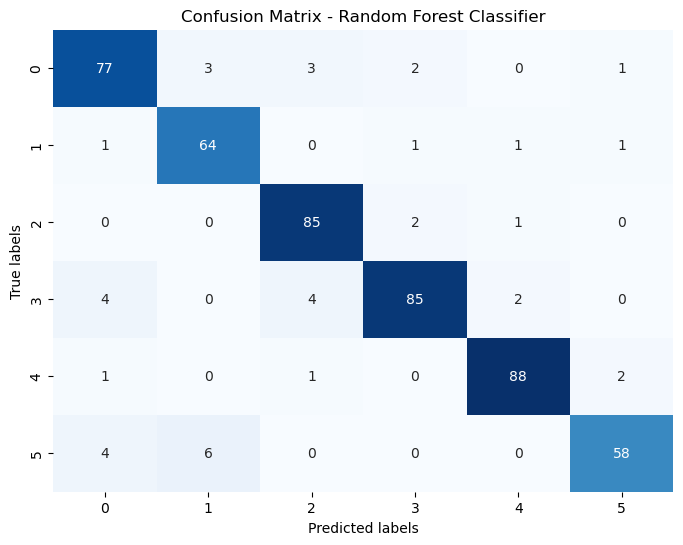

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest classifier on the features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# Evaluate the RF model on the test set
rf_accuracy = rf_model.score(X_test_features, y_test)
print(f"Random Forest Test Accuracy: {rf_accuracy}")

# Generate predictions for the test set
rf_predictions = rf_model.predict(X_test_features)

# Compute confusion matrix
cm = confusion_matrix(y_test, rf_predictions)


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


In [4]:
from sklearn.metrics import classification_report

# Compute classification report
report = classification_report(y_test, rf_predictions, target_names=rf_model.classes_, output_dict=True)

# Print recall, precision, and F1-score for each class
for label in rf_model.classes_:
    print(f"\nMetrics for {label}:")
    print(f"Precision: {report[label]['precision']:.4f}")
    print(f"Recall: {report[label]['recall']:.4f}")
    print(f"F1-score: {report[label]['f1-score']:.4f}")

# Overall metrics
print("\nOverall metrics:")
print(f"Precision (weighted average): {report['weighted avg']['precision']:.4f}")
print(f"Recall (weighted average): {report['weighted avg']['recall']:.4f}")
print(f"F1-score (weighted average): {report['weighted avg']['f1-score']:.4f}")



Metrics for 0:
Precision: 0.8851
Recall: 0.8953
F1-score: 0.8902

Metrics for 1:
Precision: 0.8767
Recall: 0.9412
F1-score: 0.9078

Metrics for 2:
Precision: 0.9140
Recall: 0.9659
F1-score: 0.9392

Metrics for 3:
Precision: 0.9444
Recall: 0.8947
F1-score: 0.9189

Metrics for 4:
Precision: 0.9565
Recall: 0.9565
F1-score: 0.9565

Metrics for 5:
Precision: 0.9355
Recall: 0.8529
F1-score: 0.8923

Overall metrics:
Precision (weighted average): 0.9205
Recall (weighted average): 0.9195
F1-score (weighted average): 0.9193


In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rf_predictions, average='weighted')
recall = recall_score(y_test, rf_predictions, average='weighted')
f1 = f1_score(y_test, rf_predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9205163256736629
Recall: 0.9195171026156942
F1 Score: 0.9193391626249018


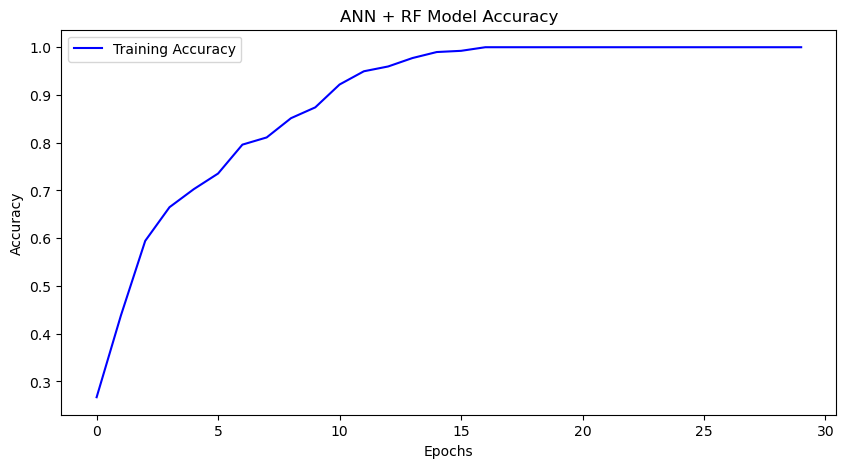

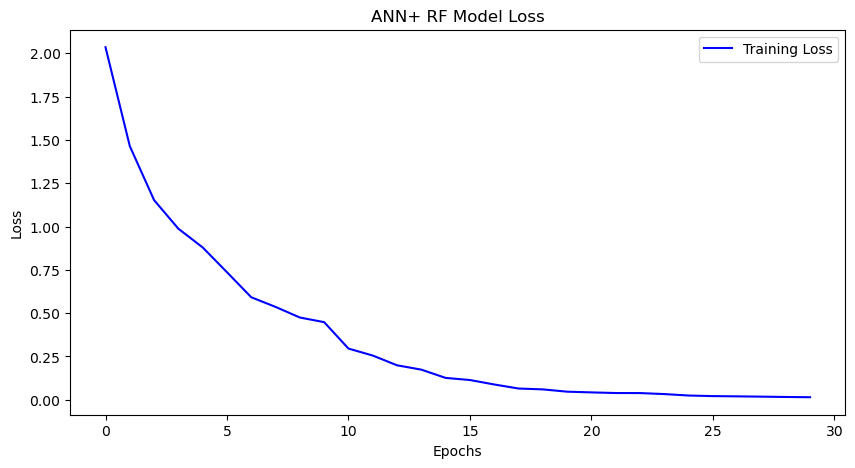

In [6]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.title('ANN + RF Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.title('ANN+ RF Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



## ANN + SVM

In [7]:
from sklearn.svm import SVC

# Train the ANN model
history = ann_model.fit(X_train_flat, y_train, epochs=30, batch_size=32, validation_data=(X_val_flat, y_val))

# Extract features from hidden layers of the ANN
hidden_layer_model = Sequential(ann_model.layers[:-1])  # Remove output layer
X_train_features = hidden_layer_model.predict(X_train_flat)
X_val_features = hidden_layer_model.predict(X_val_flat)
X_test_features = hidden_layer_model.predict(X_test_flat)

# Reduce dimensionality of features if necessary
# For example, you can use PCA or other dimensionality reduction techniques

# Train SVM classifier on the features
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # You can adjust kernel and C parameter as needed
svm_model.fit(X_train_features, y_train)



Epoch 1/30
13/13 [==============================] - 0s 25ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 1.1606 - val_accuracy: 0.6200
Epoch 2/30
13/13 [==============================] - 0s 20ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 1.1528 - val_accuracy: 0.6300
Epoch 3/30
13/13 [==============================] - 0s 20ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 1.1834 - val_accuracy: 0.6300
Epoch 4/30
13/13 [==============================] - 0s 20ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 1.1742 - val_accuracy: 0.6100
Epoch 5/30
13/13 [==============================] - 0s 19ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 1.1873 - val_accuracy: 0.6300
Epoch 6/30
13/13 [==============================] - 0s 20ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.1688 - val_accuracy: 0.6200
Epoch 7/30
13/13 [==============================] - 0s 20ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.2276 - val_accuracy: 0.6200
Epoch 8/30
13

SVC(kernel='linear', random_state=42)

SVM Test Accuracy: 0.9215291750503019


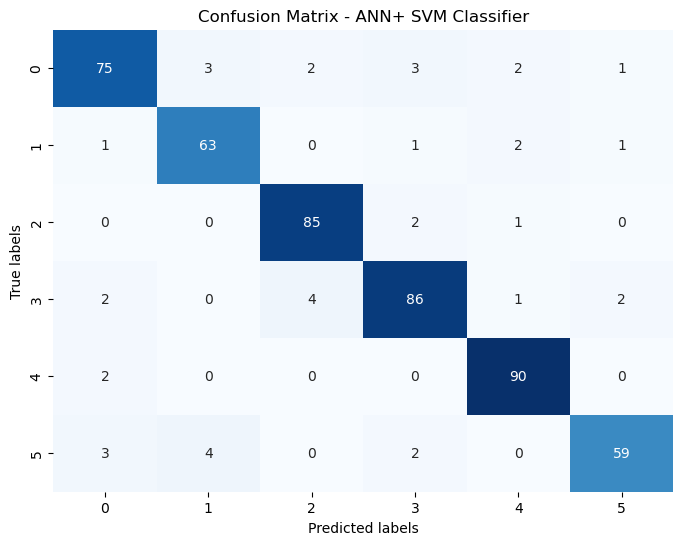

Precision: 0.9214408025570566
Recall: 0.9215291750503019
F1 Score: 0.9210981442612673


In [8]:

# Evaluate the SVM model on the test set
svm_accuracy = svm_model.score(X_test_features, y_test)
print(f"SVM Test Accuracy: {svm_accuracy}")

# Generate predictions for the test set
svm_predictions = svm_model.predict(X_test_features)

# Compute confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - ANN+ SVM Classifier')
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, svm_predictions, average='weighted')
recall = recall_score(y_test, svm_predictions, average='weighted')
f1 = f1_score(y_test, svm_predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



In [9]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, svm_predictions, target_names=svm_model.classes_, output_dict=True)

# Print precision, recall, and F1-score for each class
for label in svm_model.classes_:
    print(f"\nMetrics for {label}:")
    print(f"Precision: {report[label]['precision']:.4f}")
    print(f"Recall: {report[label]['recall']:.4f}")
    print(f"F1-score: {report[label]['f1-score']:.4f}")

# Overall metrics
print("\nOverall metrics:")
print(f"Precision (weighted average): {report['weighted avg']['precision']:.4f}")
print(f"Recall (weighted average): {report['weighted avg']['recall']:.4f}")
print(f"F1-score (weighted average): {report['weighted avg']['f1-score']:.4f}")



Metrics for 0:
Precision: 0.9036
Recall: 0.8721
F1-score: 0.8876

Metrics for 1:
Precision: 0.9000
Recall: 0.9265
F1-score: 0.9130

Metrics for 2:
Precision: 0.9341
Recall: 0.9659
F1-score: 0.9497

Metrics for 3:
Precision: 0.9149
Recall: 0.9053
F1-score: 0.9101

Metrics for 4:
Precision: 0.9375
Recall: 0.9783
F1-score: 0.9574

Metrics for 5:
Precision: 0.9365
Recall: 0.8676
F1-score: 0.9008

Overall metrics:
Precision (weighted average): 0.9214
Recall (weighted average): 0.9215
F1-score (weighted average): 0.9211


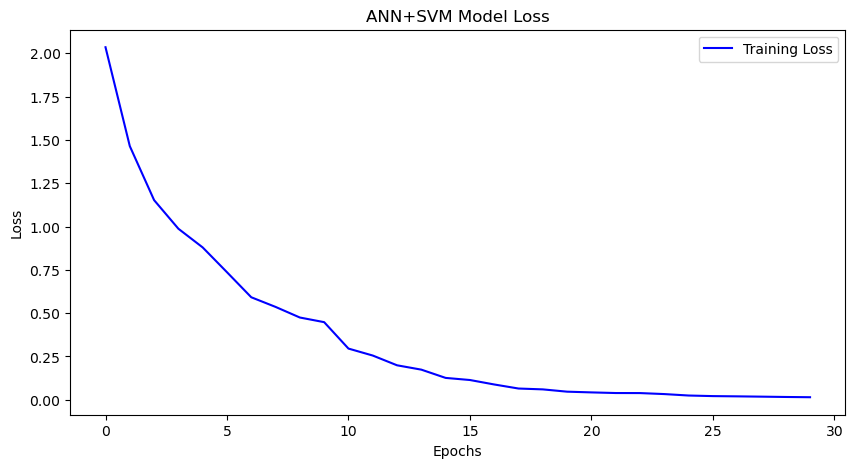

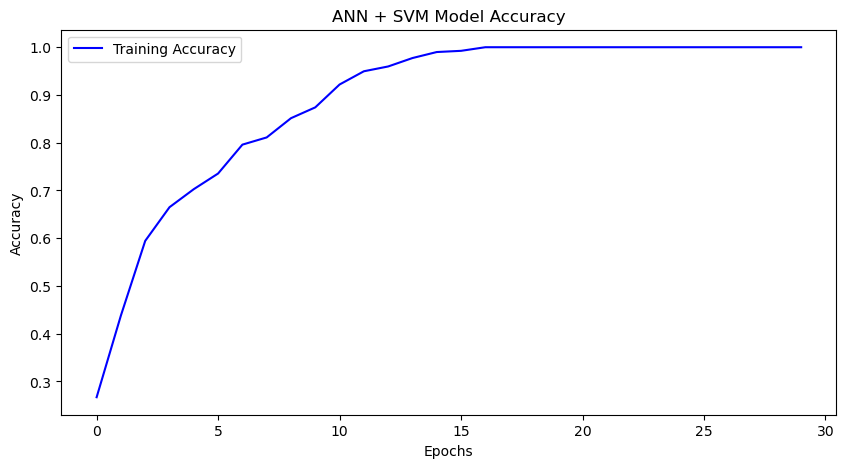

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.title('ANN+SVM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.title('ANN + SVM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## ANN WITH BIOMAKERS

## using label encoder 

In [75]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load additional data from Excel file
excel_path_additional = 'biomarkers.xlsx'
additional_data = pd.read_excel(excel_path_additional)

# Assuming 'X_train_flat', 'X_val_flat', 'X_test_flat' are already defined
# Assuming 'y_train' and 'y_val' are already defined

# Extract features from hidden layers of the ANN
hidden_layer_model = Sequential(ann_model.layers[:-1])  # Remove output layer
X_train_features = hidden_layer_model.predict(X_train_flat)
X_val_features = hidden_layer_model.predict(X_val_flat)
X_test_features = hidden_layer_model.predict(X_test_flat)

# Ensure the number of samples in additional_data matches the number of samples in the extracted features
additional_data = additional_data.iloc[:min(len(additional_data), len(X_train_features))]

# Concatenate additional data with the extracted features for training set
X_train_combined = np.concatenate((X_train_features[:len(additional_data)], additional_data), axis=1)

# Ensure the number of samples in additional_data matches the number of samples in the extracted features
additional_data = additional_data.iloc[:min(len(additional_data), len(X_val_features))]

# Concatenate additional data with the extracted features for validation set
X_val_combined = np.concatenate((X_val_features[:len(additional_data)], additional_data), axis=1)

# Ensure the number of samples in additional_data matches the number of samples in the extracted features
additional_data = additional_data.iloc[:min(len(additional_data), len(X_test_features))]

# Concatenate additional data with the extracted features for test set
X_test_combined = np.concatenate((X_test_features[:len(additional_data)], additional_data), axis=1)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_combined_imputed = imputer.fit_transform(X_train_combined)
X_val_combined_imputed = imputer.transform(X_val_combined)
X_test_combined_imputed = imputer.transform(X_test_combined)

# Reduce dimensionality of features using PCA
n_components = min(X_train_combined_imputed.shape[0], X_train_combined_imputed.shape[1]) - 1
pca = PCA(n_components=n_components)  # Automatically select the maximum possible number of components
X_train_combined_pca = pca.fit_transform(X_train_combined_imputed)
X_val_combined_pca = pca.transform(X_val_combined_imputed)
X_test_combined_pca = pca.transform(X_test_combined_imputed)

# Define the architecture of the ANN model
ann_model = Sequential([
    Dense(64, input_dim=X_train_combined_pca.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(6, activation='softmax')
])

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the ANN model
history = ann_model.fit(X_train_combined_pca, y_train, epochs=30, batch_size=32, validation_data=(X_val_combined_pca, y_val))

# Evaluate the ANN model on validation set
y_val_pred_prob = ann_model.predict(X_val_combined_pca)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the accuracy and loss curves
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.legend()

plt.show()


ValueError: in user code:

    File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_41" is incompatible with the layer: expected shape=(None, 39), found shape=(None, 16384)


In [76]:
# Perform necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV

# Load additional data from Excel file
excel_path_additional = 'biomarkers.xlsx'
additional_data = pd.read_excel(excel_path_additional)

# Assuming 'X_train_flat', 'X_val_flat', 'X_test_flat' are already defined
# Assuming 'y_train' and 'y_val' are already defined

# Preprocess the additional data
# Perform any necessary preprocessing steps like scaling, imputing missing values, etc.
# For example:
imputer = SimpleImputer(strategy='mean')
additional_data_imputed = imputer.fit_transform(additional_data)
scaler = StandardScaler()
additional_data_scaled = scaler.fit_transform(additional_data_imputed)

# Split the additional data into train, validation, and test sets
# Split additional_data into train, validation, and test sets
# Assuming 'y_additional' is the target variable for the additional data
# Replace this with the actual target variable from your dataset
y_additional = additional_data['target_column_name']

# Split the additional data into train, validation, and test sets
X_train_add, X_test_add, y_train_add, y_test_add = train_test_split(additional_data_scaled, y_additional, test_size=0.2, random_state=42)
X_val_add, X_test_add, y_val_add, y_test_add = train_test_split(X_test_add, y_test_add, test_size=0.5, random_state=42)



# Combine additional data with extracted features for training set
X_train_combined = np.concatenate((X_train_features[:len(X_train_add)], X_train_add), axis=1)

# Combine additional data with extracted features for validation set
X_val_combined = np.concatenate((X_val_features[:len(X_val_add)], X_val_add), axis=1)

# Combine additional data with extracted features for test set
X_test_combined = np.concatenate((X_test_features[:len(X_test_add)], X_test_add), axis=1)

# Define the architecture of the ANN model
ann_model = Sequential([
    Dense(64, input_dim=X_train_combined.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the ANN model
history = ann_model.fit(X_train_combined, y_train_add, epochs=30, batch_size=32, validation_data=(X_val_combined, y_val_add))

# Evaluate the ANN model on test set
y_test_pred_prob = ann_model.predict(X_test_combined)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
accuracy = accuracy_score(y_test_add, y_test_pred)
print("Test Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_add, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the accuracy and loss curves
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.legend()

plt.show()



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 1' 'Unnamed: 2' 'Unnamed: 4' 'Unnamed: 6' 'Unnamed: 8'
 'Unnamed: 10' 'Unnamed: 12' 'Unnamed: 14']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


KeyError: 'target_column_name'

In [77]:
# Print the column names of the additional_data DataFrame
print(additional_data.columns)



Index(['RID', 'Unnamed: 1', 'Unnamed: 2', 'ABETA42', 'Unnamed: 4', 'MMSCORE',
       'Unnamed: 6', 'FH', 'Unnamed: 8', 'C3', 'Unnamed: 10', 'ALPHA_SYN',
       'Unnamed: 12', 'HEMOGLOBIN', 'Unnamed: 14', 'APOE4'],
      dtype='object')
